In [63]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

%matplotlib inline

In [2]:
#Reading the csv file and converting it to a dataframe with pandas for analysis with name data
data = pd.read_csv('shootings.csv') 

# 1. Understanding The Data
##    This is made up of the various codes to bring out the general overview and meaning of the dataset 

In [3]:
#Getting an overview of what the data contains
#Including the various columns that make up the dataset
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


##### The above output shows that our data was properly loaded into the jupyter notebook

In [4]:
#Checking the first 5 rows of the dataset to get the head of the dataset
#This is to check to see if the loading was done appropriately and none of the first five rows contain weird values
#The .head() method helps to get this in place
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


##### The above output shows that the first 5 rows of our dataset has no issues

In [5]:
#Checking the last 5 rows of the dataset to get the head of the dataset
#This is to check to see if the loading was done appropriately and none of the last five rows contain weird values
#The .tail() method helps to get this in place
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


##### The above output shows that the last 5 rows of our dataset has no issues

In [6]:
#This is to get the total number of rows and columns in the dataset
#This gives an overview of what the whole data entails
#It returns a tuple with the first entry for the rows and the second the total number of columns including the part for the ids given by Jupyter
data.shape

(4895, 15)

##### The above output shows that our data consists of 15 columns and 4895 rows

In [7]:
#This gives an overview of where the data starts and where it ends
data.index

RangeIndex(start=0, stop=4895, step=1)

In [8]:
#Also, it will be important to get the scope of numerical values in the dataset
#These will include the minimum, maximum, count, standard deviations and the various percentile values
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


##### The above code shows that the max age is 91 and the max id is 5925. 

In [9]:
#Data is well explored when we know all that the values columns hold
#Their data types, and whether some have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [10]:
#For exploring data, it will be great to know the various names of all the columns as a list
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [11]:
#To check whether any of the columns have a null value
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

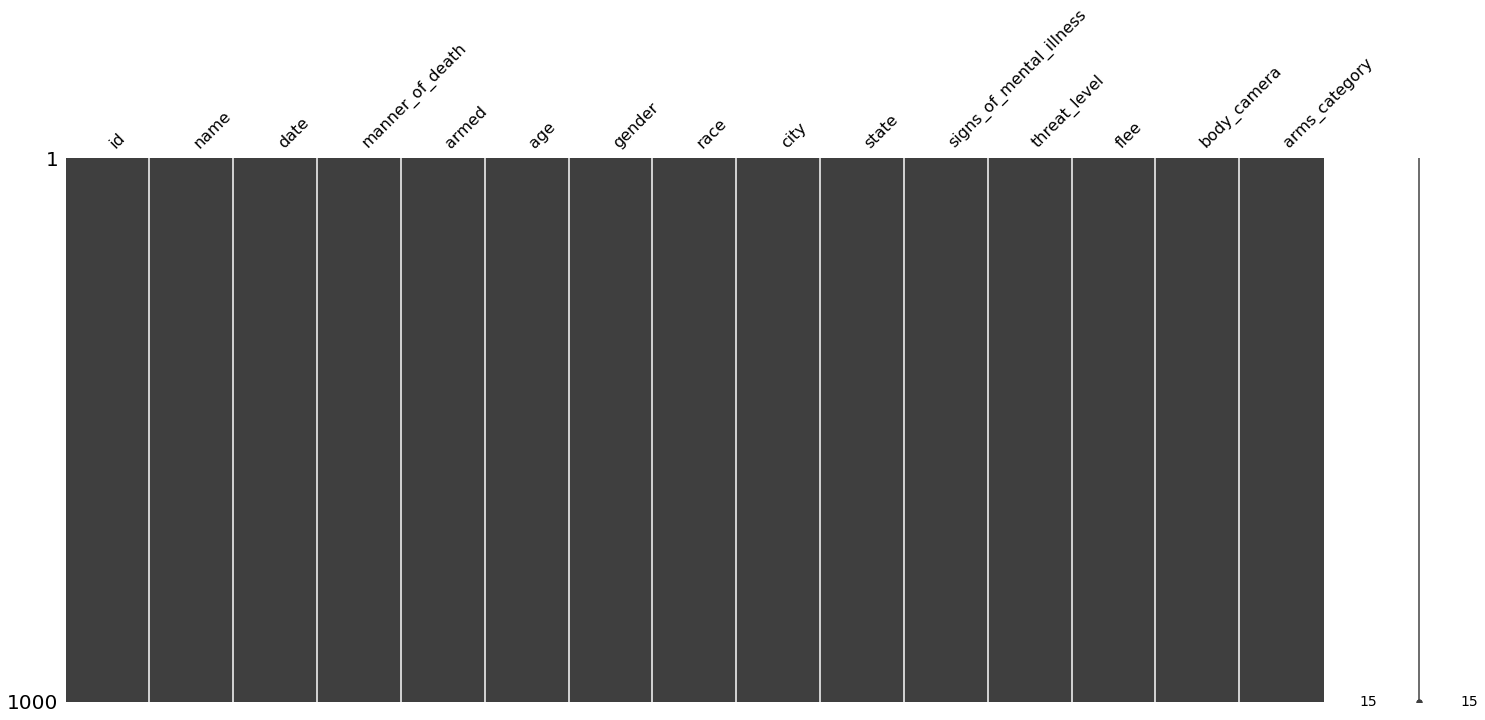

In [12]:
#The missingno module can be used to graphically show the nullity of the data using the matrix command
msno.matrix(data.sample(1000));

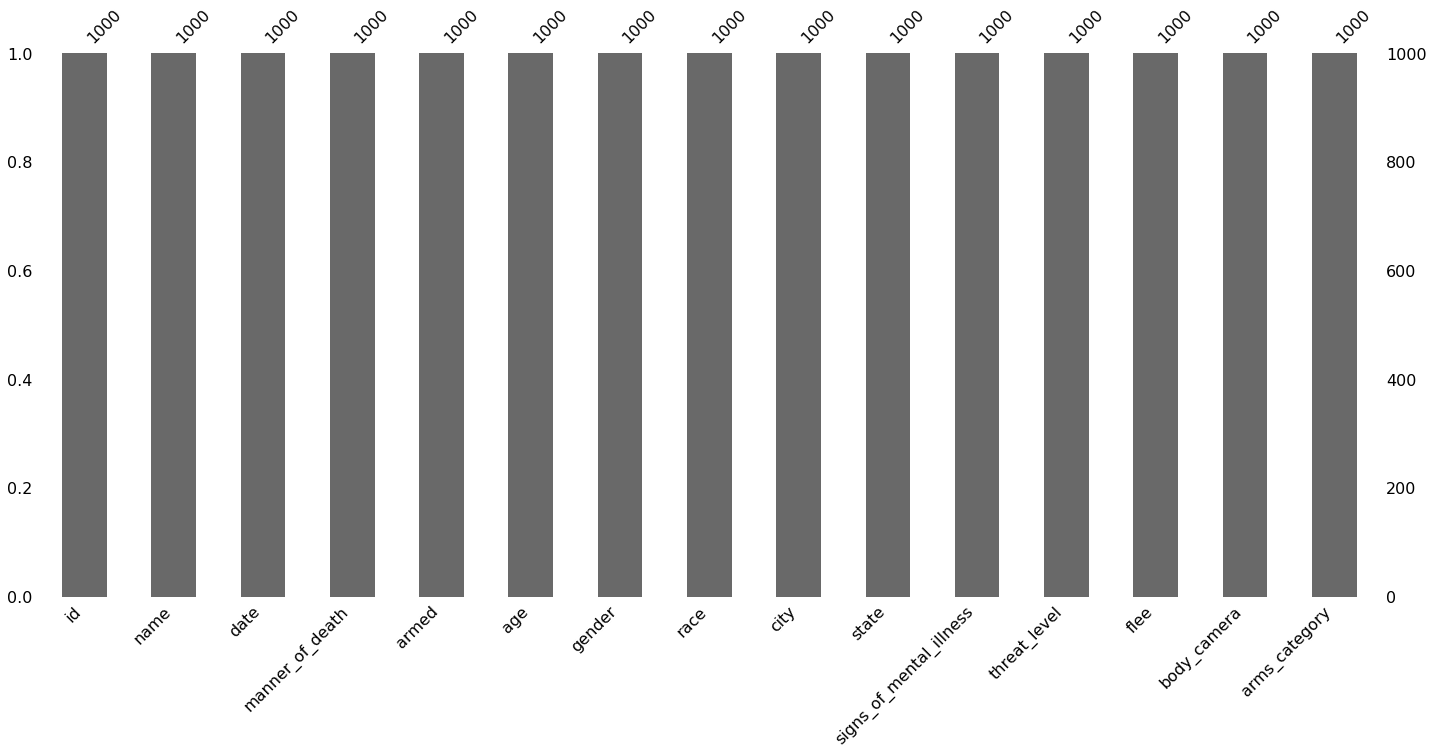

In [13]:
#The missingno module can be used to graphically show the nullity of the data using the bar command
msno.bar(data.sample(1000));

In [14]:
#To get an array of the various unique names in the data
data['name'].unique()

array(['Tim Elliot', 'Lewis Lee Lembke', 'John Paul Quintero', ...,
       'Hannah Fizer', 'William Slyter', 'Nicholas Hirsh'], dtype=object)

In [15]:
#To get the total number of all the values that make up the name column
data.name.value_counts(ascending=True, dropna = False)

Harry Gipson                1
Dylan Joseph-Mark Cross     1
Isaac Padilla               1
Steven Alfred Longoria      1
Glenn Southwood Jr.         1
                           ..
Jeffrey Sims                2
Miguel Mercado Segura       2
Michael Brown               2
Roderick McDaniel           2
TK TK                      29
Name: name, Length: 4851, dtype: int64

In [16]:
#To get an array of the various unique dates in the data
data['date'].unique()

array(['2015-01-02', '2015-01-03', '2015-01-04', ..., '2020-06-12',
       '2020-06-13', '2020-06-15'], dtype=object)

In [17]:
#To get the total count of each value that makes up the date column
data.date.value_counts(ascending=True, dropna = False)

2019-12-09    1
2015-05-02    1
2016-03-14    1
2016-05-13    1
2019-06-07    1
             ..
2018-03-12    8
2019-01-28    8
2018-04-01    9
2018-06-29    9
2018-01-06    9
Name: date, Length: 1792, dtype: int64

In [18]:
#To get an array of the various unique manner_of_death in the data
data['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [19]:
#To get the total count of each value that makes up the manner_of_death column
data.manner_of_death.value_counts(ascending=True, dropna=False)

shot and Tasered     248
shot                4647
Name: manner_of_death, dtype: int64

In [20]:
#To get an array of the various unique armed values in the data
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [21]:
#To get the total count of each value that makes up the armed column
data.armed.value_counts(ascending=True, dropna=False)

walking stick         1
nail gun              1
metal rake            1
air conditioner       1
grenade               1
                   ... 
toy weapon          171
unarmed             348
unknown             418
knife               708
gun                2755
Name: armed, Length: 89, dtype: int64

In [22]:
#To get an array of the various unique age values in the data
data['age'].unique()

array([53.       , 47.       , 23.       , 32.       , 39.       ,
       18.       , 22.       , 35.       , 34.       , 25.       ,
       31.       , 41.       , 30.       , 37.       , 28.       ,
       42.       , 36.       , 49.       , 71.       , 33.       ,
       29.       , 43.       , 24.       , 75.       , 68.       ,
       27.       , 48.       , 21.       , 67.       , 19.       ,
       54.       , 17.       , 56.       , 61.       , 45.       ,
       26.       , 40.       , 59.       , 38.       , 51.       ,
       74.       , 57.       , 46.       , 16.       , 50.       ,
       20.       , 77.       , 37.1179309, 58.       , 64.       ,
       52.       , 63.       , 44.       , 60.       , 66.       ,
       83.       , 72.       , 76.       , 62.       , 55.       ,
       69.       , 15.       , 65.       ,  6.       , 12.       ,
       70.       , 80.       , 14.       , 82.       , 13.       ,
       73.       , 91.       , 79.       , 78.       , 84.    

In [23]:
#To get the total count of each value that makes up the age column
data.age.value_counts(ascending=True, dropna=False)

91.0      1
78.0      1
81.0      1
79.0      1
12.0      1
       ... 
29.0    160
33.0    164
27.0    165
31.0    174
25.0    176
Name: age, Length: 76, dtype: int64

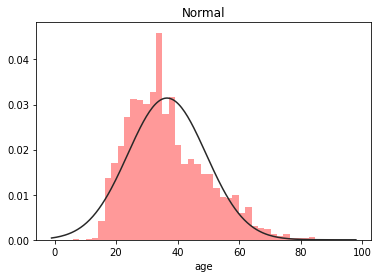

In [24]:
#Since the age column is made up of values it will be idea to check the kind of distribution
#So here we plot the age column with respect to a normal distribution curve to see its behaviour
y = data['age']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm, color='red');

In [25]:
#To get an array of the various unique gender values in the data
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [26]:
#To get the total count of each value that makes up the gender column
data.gender.value_counts(ascending=True, dropna=False)

F     222
M    4673
Name: gender, dtype: int64

In [27]:
#To get an array of the various unique race values in the data
data['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [28]:
#To get the total count of each value that makes up the race column
data.race.value_counts(ascending=True, dropna=False)

Other         48
Native        78
Asian         93
Hispanic     902
Black       1298
White       2476
Name: race, dtype: int64

In [29]:
#To get an array of the various unique city values in the data
data['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Industry', 'Paso Robles',
       'Crown Point'], dtype=object)

In [30]:
#To get the total count of each value that makes up the city column
data.city.value_counts(ascending=True, dropna=False)

Finney County     1
Boyle Heights     1
Carson            1
Searcy County     1
Lamont            1
                 ..
San Antonio      40
Las Vegas        41
Houston          51
Phoenix          66
Los Angeles      78
Name: city, Length: 2288, dtype: int64

In [31]:
#To get an array of the various unique state values in the data
data['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [32]:
#To get the total count of each value that makes up the state column
data.state.value_counts(ascending=True, dropna=False).head()

RI     4
VT     8
DE    10
ND    11
NH    12
Name: state, dtype: int64

In [33]:
#To get the total count of each value that makes up the state column
data.state.value_counts(ascending=True, dropna=False).tail()

CO    168
AZ    222
FL    324
TX    426
CA    701
Name: state, dtype: int64

In [34]:
#To get an array of the various unique signs_of_mental_illness values in the data
data['signs_of_mental_illness'].unique()

array([ True, False])

In [35]:
#To get the total count of each value that makes up the signs_of_mental_illness column
data.signs_of_mental_illness.value_counts(ascending=True, dropna=False)

True     1103
False    3792
Name: signs_of_mental_illness, dtype: int64

In [36]:
#To get an array of the various unique threat_level values in the data
data['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [37]:
#To get the total count of each value that makes up the threat_level column
data.threat_level.value_counts(ascending=True, dropna=False)

undetermined     207
other           1528
attack          3160
Name: threat_level, dtype: int64

In [38]:
#To get an array of the various unique flee values in the data
data['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [39]:
#To get the total count of each value that makes up the flee column
data.flee.value_counts(ascending=True, dropna=False)

Other           360
Foot            642
Car             820
Not fleeing    3073
Name: flee, dtype: int64

In [40]:
#To get an array of the various unique body_camera values in the data
data['body_camera'].unique()

array([False,  True])

In [41]:
#To get the total count of each value that makes up the body_camera column
data.body_camera.value_counts(ascending=True, dropna=False)

True      578
False    4317
Name: body_camera, dtype: int64

In [42]:
#To get an array of the various unique arms_category values in the data
data['arms_category'].unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [43]:
#To get the total count of each value that makes up the arms_category column
data.arms_category.value_counts(ascending=True, dropna=False)

Hand tools                  1
Explosives                  4
Electrical devices         24
Piercing objects           29
Multiple                   54
Vehicles                  121
Blunt instruments         122
Other unusual objects     192
Unarmed                   348
Unknown                   418
Sharp objects             818
Guns                     2764
Name: arms_category, dtype: int64

In [44]:
#Code to see the various deaths grouped by the dates
for group_key, group_value in data.groupby('date'):
    print(group_key)
    print(group_value)

2015-01-02
   id              name        date manner_of_death armed   age gender   race  \
0   3        Tim Elliot  2015-01-02            shot   gun  53.0      M  Asian   
1   4  Lewis Lee Lembke  2015-01-02            shot   gun  47.0      M  White   

      city state  signs_of_mental_illness threat_level         flee  \
0  Shelton    WA                     True       attack  Not fleeing   
1    Aloha    OR                    False       attack  Not fleeing   

   body_camera arms_category  
0        False          Guns  
1        False          Guns  
2015-01-03
   id                name        date   manner_of_death    armed   age gender  \
2   5  John Paul Quintero  2015-01-03  shot and Tasered  unarmed  23.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2  Hispanic  Wichita    KS                    False        other  Not fleeing   

   body_camera arms_category  
2        False       Unarmed  
2015-01-04
   id               name    

89        False          Guns  
2015-02-07
     id          name        date manner_of_death       armed   age gender  \
90  532  John  Sawyer  2015-02-07            shot  toy weapon  26.0      M   
91  554   James Allen  2015-02-07            shot         gun  74.0      M   

     race      city state  signs_of_mental_illness threat_level         flee  \
90  White  Calimesa    CA                    False       attack  Not fleeing   
91  Black  Gastonia    NC                    False       attack  Not fleeing   

    body_camera          arms_category  
90        False  Other unusual objects  
91        False                   Guns  
2015-02-08
     id                   name        date manner_of_death armed   age gender  \
92  131  John Martin Whittaker  2015-02-08            shot   gun  33.0      M   
93  132          Sawyer Flache  2015-02-08            shot   gun  27.0      M   
94  133        Vincent Cordaro  2015-02-08            shot   gun  57.0      M   
95  134          Joseph

      id               name        date manner_of_death  armed   age gender  \
201  225      Kaylene Stone  2015-03-18            shot    gun  49.0      F   
202  226  Garland Lee Wingo  2015-03-18            shot    gun  64.0      M   
203  294     Jeff Alexander  2015-03-18            shot  knife  47.0      M   

      race         city state  signs_of_mental_illness threat_level  \
201  White     Glendale    AZ                    False       attack   
202  White  Tallahassee    FL                    False       attack   
203  White  Bakersfield    CA                    False        other   

            flee  body_camera  arms_category  
201  Not fleeing        False           Guns  
202  Not fleeing        False           Guns  
203  Not fleeing        False  Sharp objects  
2015-03-19
      id                name        date manner_of_death       armed   age  \
204  228       Shane Watkins  2015-03-19            shot  box cutter  39.0   
205  229       Brandon Jones  2015-03-19   

307         Foot         True          Guns  
2015-04-25
      id              name        date manner_of_death    armed   age gender  \
308  408  Brandon Lawrence  2015-04-25            shot  machete  25.0      M   
309  411       David Felix  2015-04-25            shot  unarmed  24.0      M   
310  414      Daniel Davis  2015-04-25            shot    knife  58.0      M   

      race      city state  signs_of_mental_illness threat_level         flee  \
308  White  Victoria    TX                     True        other  Not fleeing   
309  Black  New York    NY                     True       attack         Foot   
310  White  Clermont    FL                     True        other  Not fleeing   

     body_camera  arms_category  
308         True  Sharp objects  
309        False        Unarmed  
310        False  Sharp objects  
2015-04-26
      id               name        date manner_of_death    armed   age gender  \
311  404  Billy Joe Patrick  2015-04-26            shot  unarmed  29.

409           Guns  
2015-06-07
      id                    name        date manner_of_death armed   age  \
410  514  Matthew Wayne McDaniel  2015-06-07            shot   gun  36.0   
411  517           Gene Marshall  2015-06-07            shot   gun  58.0   

    gender   race       city state  signs_of_mental_illness threat_level  \
410      M  White  Melbourne    FL                    False       attack   
411      M  White   Woodland    WA                     True       attack   

            flee  body_camera arms_category  
410  Not fleeing        False          Guns  
411  Not fleeing        False          Guns  
2015-06-08
      id            name        date manner_of_death  armed   age gender  \
412  524     Rene Garcia  2015-06-08            shot  knife  30.0      M   
413  526  Richard Warolf  2015-06-08            shot    gun  69.0      M   

         race      city state  signs_of_mental_illness threat_level  \
412  Hispanic   Anaheim    CA                     True       

510  Not fleeing        False  Blunt instruments  
2015-07-16
      id                         name        date   manner_of_death  \
511  646             Antonio Gonzalez  2015-07-16              shot   
512  647            Edward Foster III  2015-07-16              shot   
513  648       Patrick Stephen Pippin  2015-07-16              shot   
514  649  Mohammad Youssef Abdulazeez  2015-07-16              shot   
515  656                   Saige Hack  2015-07-16              shot   
516  664      Pierre Gabriel Koellner  2015-07-16              shot   
517  642               Anthonie Smith  2015-07-16  shot and Tasered   

               armed   age gender      race           city state  \
511            sword  29.0      M  Hispanic      Wauwatosa    WI   
512              gun  35.0      M     Black      Homestead    FL   
513              gun  30.0      M     White    Kansas City    KS   
514              gun  24.0      M     Other    Chattanooga    TN   
515              gun  23.0   

616  Not fleeing        False  Sharp objects  
2015-08-22
      id                  name        date   manner_of_death    armed   age  \
617  762        Adam Schneider  2015-08-22              shot      gun  31.0   
618  764    Jason Lee Alderman  2015-08-22              shot  carjack  29.0   
619  765       Nicholas Garner  2015-08-22              shot  unknown  26.0   
620  766  Kenneth Henry Morgan  2015-08-22              shot    knife  64.0   
621  763       Thaddeus Faison  2015-08-22  shot and Tasered      gun  39.0   

    gender   race         city state  signs_of_mental_illness  threat_level  \
617      M  White     Cohasset    MN                    False        attack   
618      M  White  Bakersfield    CA                    False  undetermined   
619      M  White      Wichita    KS                    False        attack   
620      M  White  King George    VA                    False         other   
621      M  Black         Troy    NY                    False        att

715  Not fleeing        False  Piercing objects  
2015-09-25
      id            name        date   manner_of_death       armed   age  \
716  866  William Lemmon  2015-09-25              shot     unarmed  21.0   
717  868   Jeffrey Blood  2015-09-25              shot         gun  45.0   
718  867  James Anderson  2015-09-25  shot and Tasered  box cutter  33.0   

    gender   race     city state  signs_of_mental_illness  threat_level  \
716      M  White    Akron    OH                     True  undetermined   
717      M  White  Wilhoit    AZ                    False        attack   
718      M  Black  Chicago    IL                    False         other   

            flee  body_camera  arms_category  
716        Other        False        Unarmed  
717  Not fleeing        False           Guns  
718  Not fleeing        False  Sharp objects  
2015-09-26
      id              name        date manner_of_death  armed   age gender  \
719  869  Anthony McKinney  2015-09-26            shot  

822  Not fleeing        False       Unknown  
2015-11-09
       id                  name        date   manner_of_death         armed  \
823   989        Delvin Simmons  2015-11-09              shot       unknown   
824   991         Cesar Cuellar  2015-11-09              shot           gun   
825   993  Dale Maverick Hudson  2015-11-09              shot           gun   
826   994        Leonel Acevedo  2015-11-09              shot           gun   
827  1001           Miguel Cano  2015-11-09  shot and Tasered  bean-bag gun   

      age gender      race            city state  signs_of_mental_illness  \
823  20.0      M     Black     Spartanburg    SC                    False   
824  25.0      M  Hispanic    North Laredo    TX                     True   
825  26.0      M     White  Braxton County    WV                    False   
826  45.0      M  Hispanic        San Jose    CA                    False   
827  35.0      M  Hispanic     Los Angeles    CA                    False   

    t

928  Not fleeing        False  Sharp objects  
2015-12-17
       id                  name        date manner_of_death    armed   age  \
929  1098           Douglas Yon  2015-12-17            shot  machete  25.0   
930  1099  Christopher Fletcher  2015-12-17            shot      gun  24.0   

    gender   race     city state  signs_of_mental_illness threat_level  \
929      M  White     Kent    OH                     True        other   
930      M  White  Modesto    CA                    False       attack   

            flee  body_camera  arms_category  
929  Not fleeing        False  Sharp objects  
930        Other        False           Guns  
2015-12-18
       id                name        date manner_of_death       armed   age  \
931  1100         Erica Lauro  2015-12-18            shot         gun  22.0   
932  1101       Amos Frerichs  2015-12-18            shot     unknown  32.0   
933  1102  Robert L. Martinez  2015-12-18            shot  toy weapon  58.0   

    gender     

1046       attack   Car         True                   Guns  
2016-02-02
        id             name        date   manner_of_death  armed   age gender  \
1047  1231  Justin Prescott  2016-02-02  shot and Tasered  knife  30.0      M   

       race            city state  signs_of_mental_illness threat_level  \
1047  White  Rancho Cordova    CA                     True        other   

             flee  body_camera  arms_category  
1047  Not fleeing        False  Sharp objects  
2016-02-03
        id                      name        date manner_of_death armed   age  \
1048  1233         John Henry Neuman  2016-02-03            shot   gun  53.0   
1049  1234  Cristiaan Oliver Dubrino  2016-02-03            shot   gun  31.0   
1050  1235           Raymond Gassman  2016-02-03            shot   gun  22.0   

     gender      race      city state  signs_of_mental_illness threat_level  \
1048      M     White  Schulter    OK                    False       attack   
1049      M  Hispanic     O

        id          name        date manner_of_death armed   age gender  \
1167  1364  Lamar Harris  2016-03-14            shot   gun  29.0      M   

       race     city state  signs_of_mental_illness threat_level  flee  \
1167  Black  Chicago    IL                    False       attack  Foot   

      body_camera arms_category  
1167        False          Guns  
2016-03-15
        id               name        date manner_of_death  armed   age gender  \
1168  1366      Joseph Harris  2016-03-15            shot    gun  34.0      M   
1169  1369  Daniel J. Wooters  2016-03-15            shot  knife  38.0      M   
1170  1371  Ed Russell McIver  2016-03-15            shot    gun  43.0      M   

       race          city state  signs_of_mental_illness threat_level   flee  \
1168  White  Russellville    KY                    False        other   Foot   
1169  White    Evansville    IN                    False        other    Car   
1170  White    Fort Worth    TX                    False

1260          Car        False       Unknown  
2016-04-18
        id                  name        date manner_of_death armed   age  \
1261  1475  Rico Don Rae Johnson  2016-04-18            shot   gun  28.0   
1262  1479      Demetrius Dorsey  2016-04-18            shot   gun  18.0   

     gender   race       city state  signs_of_mental_illness threat_level  \
1261      M  Black  Greenbelt    MD                    False       attack   
1262      M  Black   Mableton    GA                    False       attack   

             flee  body_camera arms_category  
1261  Not fleeing        False          Guns  
1262  Not fleeing        False          Guns  
2016-04-19
        id                  name        date manner_of_death armed   age  \
1263  1474    Sylasone Ackhavong  2016-04-19            shot   gun  41.0   
1264  1477       Jorevis Scruggs  2016-04-19            shot   gun  15.0   
1265  1478  Daniel Eric Blackmon  2016-04-19            shot   gun  38.0   

     gender   race      

1351        attack          Car        False          Guns  
2016-05-27
        id           name        date manner_of_death armed   age gender  \
1352  1580  Terry Edwards  2016-05-27            shot   gun  59.0      M   

       race          city state  signs_of_mental_illness threat_level  \
1352  White  Indianapolis    IN                    False       attack   

             flee  body_camera arms_category  
1352  Not fleeing        False          Guns  
2016-05-28
        id             name        date manner_of_death armed   age gender  \
1353  1576    Dennis Hudson  2016-05-28            shot   gun  50.0      M   
1354  1582  Dennis Humphrey  2016-05-28            shot   gun  58.0      M   

       race         city state  signs_of_mental_illness threat_level  \
1353  Black    Eastaboga    AL                    False       attack   
1354  White  Albuquerque    NM                    False       attack   

             flee  body_camera arms_category  
1353  Not fleeing       

1456        other          Car        False        Unknown  
2016-07-04
        id                     name        date manner_of_death armed   age  \
1457  1679  William Tracy Patterson  2016-07-04            shot   gun  34.0   
1458  1681            Anthony Nunez  2016-07-04            shot   gun  18.0   
1459  1683        Sidney Washington  2016-07-04            shot   gun  21.0   

     gender      race              city state  signs_of_mental_illness  \
1457      M     White  North Charleston    SC                    False   
1458      M  Hispanic          San Jose    CA                     True   
1459      M     Black        Washington    DC                    False   

     threat_level         flee  body_camera arms_category  
1457       attack  Not fleeing         True          Guns  
1458        other  Not fleeing        False          Guns  
1459       attack  Not fleeing        False          Guns  
2016-07-05
        id             name        date   manner_of_death    ar

1549        other  Not fleeing         True  Blunt instruments  
2016-08-13
        id                         name        date manner_of_death    armed  \
1550  1780               Sylville Smith  2016-08-13            shot      gun   
1551  1781  Ruben Horacio Strand Alvear  2016-08-13            shot    knife   
1552  1784            Perry Lee Heitman  2016-08-13            shot      gun   
1553  1832             Eric Ortega Soto  2016-08-13            shot  unknown   

       age gender      race       city state  signs_of_mental_illness  \
1550  23.0      M     Black  Milwaukee    WI                    False   
1551  38.0      M  Hispanic    Phoenix    AZ                     True   
1552  53.0      M     White   Lakewood    CO                    False   
1553  36.0      M  Hispanic    Hayward    CA                    False   

     threat_level         flee  body_camera  arms_category  
1550        other         Foot         True           Guns  
1551       attack  Not fleeing     

        id                   name        date manner_of_death    armed   age  \
1659  1918          Alfred Olango  2016-09-27            shot  unarmed  38.0   
1660  1941  John Ethan Carpentier  2016-09-27            shot  unknown  26.0   

     gender   race      city state  signs_of_mental_illness threat_level  \
1659      M  Black  El Cajon    CA                     True       attack   
1660      M  White   Phoenix    AZ                    False        other   

             flee  body_camera arms_category  
1659  Not fleeing         True       Unarmed  
1660          Car        False       Unknown  
2016-09-28
        id                      name        date manner_of_death    armed  \
1661  1919        Christopher Sowell  2016-09-28            shot  unarmed   
1662  1920  Johnathan Lozano-Murillo  2016-09-28            shot    knife   

       age gender      race          city state  signs_of_mental_illness  \
1661  32.0      M     Black  Philadelphia    PA                    Fal

        id             name        date manner_of_death armed   age gender  \
1762  2034  Daniel Erickson  2016-11-09            shot   gun  36.0      M   

       race      city state  signs_of_mental_illness threat_level  \
1762  White  Show Low    AZ                    False       attack   

             flee  body_camera arms_category  
1762  Not fleeing        False          Guns  
2016-11-10
        id             name        date manner_of_death armed   age gender  \
1763  2036  George Delacruz  2016-11-10            shot   gun  41.0      M   
1764  2038    John Pacuicrk  2016-11-10            shot   gun  53.0      M   

          race        city state  signs_of_mental_illness  threat_level  \
1763  Hispanic  San Angelo    TX                    False  undetermined   
1764     White    Lakeland    FL                    False        attack   

             flee  body_camera arms_category  
1763        Other        False          Guns  
1764  Not fleeing        False          Guns

1852       attack  Not fleeing        False          Guns  
2016-12-22
        id             name        date manner_of_death armed   age gender  \
1853  2150  Terrence Thomas  2016-12-22            shot   gun  19.0      M   

       race             city state  signs_of_mental_illness threat_level  \
1853  Black  Capitol Heights    MD                    False       attack   

             flee  body_camera arms_category  
1853  Not fleeing        False          Guns  
2016-12-23
        id                   name        date   manner_of_death    armed  \
1854  2165  Michael Tyler Jacques  2016-12-23  shot and Tasered  unknown   

       age gender   race  city state  signs_of_mental_illness  threat_level  \
1854  31.0      M  White  Bend    OR                     True  undetermined   

             flee  body_camera arms_category  
1854  Not fleeing        False       Unknown  
2016-12-24
        id                      name        date manner_of_death     armed  \
1855  2158  Daquan 

1958        other  Not fleeing        False  Sharp objects  
2017-01-31
        id   name        date   manner_of_death  armed        age gender  \
1959  2278  TK TK  2017-01-31  shot and Tasered  knife  37.117931      M   

       race       city state  signs_of_mental_illness threat_level  \
1959  Black  Hollywood    CA                     True       attack   

             flee  body_camera  arms_category  
1959  Not fleeing        False  Sharp objects  
2017-02-01
        id           name        date manner_of_death    armed   age gender  \
1960  2280    Tavis Crane  2017-02-01            shot  unknown  23.0      M   
1961  2301  Michael Russo  2017-02-01            shot  unknown  31.0      M   

       race       city state  signs_of_mental_illness threat_level flee  \
1960  Black  Arlington    TX                    False       attack  Car   
1961  Black   Highland    CA                    False       attack  Car   

      body_camera arms_category  
1960        False       Unkno

        id              name        date manner_of_death armed   age gender  \
2071  2407   Frank W. Wratny  2017-03-08            shot   gun  91.0      M   
2072  2409  Iaroslav Mosiiuk  2017-03-08            shot   gun  25.0      M   

       race            city state  signs_of_mental_illness threat_level  \
2071  White  Union Township    PA                    False       attack   
2072  White       Charlotte    NC                     True        other   

             flee  body_camera arms_category  
2071  Not fleeing        False          Guns  
2072  Not fleeing        False          Guns  
2017-03-09
        id                 name        date   manner_of_death  \
2073  2411       Steven Schiltz  2017-03-09              shot   
2074  2410  Jesus Alberto Geney  2017-03-09  shot and Tasered   

                        armed   age gender      race              city state  \
2073  baseball bat and bottle  29.0      M     White  Huntington Beach    CA   
2074                    knif

        id          name        date manner_of_death    armed   age gender  \
2161  2511  Casey Desper  2017-04-18            shot  unknown  32.0      M   

       race        city state  signs_of_mental_illness threat_level flee  \
2161  White  Brandywine    WV                    False       attack  Car   

      body_camera arms_category  
2161        False       Unknown  
2017-04-19
        id         name        date manner_of_death armed   age gender   race  \
2162  2514  Keith Price  2017-04-19            shot   gun  21.0      M  Black   

            city state  signs_of_mental_illness threat_level   flee  \
2162  Wilmington    DE                    False       attack  Other   

      body_camera arms_category  
2162         True          Guns  
2017-04-20
        id                 name        date   manner_of_death    armed   age  \
2163  2513  Marion Lee Holliday  2017-04-20              shot      gun  64.0   
2164  2515       Damarius Butts  2017-04-20              shot     

2256        attack  Not fleeing        False  Other unusual objects  
2017-05-27
        id                 name        date manner_of_death    armed   age  \
2257  2612  Ron Harlan Lewallen  2017-05-27            shot  unknown  30.0   

     gender   race    city state  signs_of_mental_illness threat_level flee  \
2257      M  White  Oneida    TN                    False        other  Car   

      body_camera arms_category  
2257        False       Unknown  
2017-05-28
        id                     name        date manner_of_death armed   age  \
2258  2610  Shaquian Tyrone Johnson  2017-05-28            shot   gun  22.0   

     gender   race  city state  signs_of_mental_illness threat_level  \
2258      M  Black  Cary    NC                    False       attack   

             flee  body_camera arms_category  
2258  Not fleeing        False          Guns  
2017-05-29
        id            name        date manner_of_death    armed   age gender  \
2259  2607     Chad Dionne  2017-05

2341     Electrical devices  
2017-06-30
        id             name        date manner_of_death    armed   age gender  \
2342  2725     Chet Knuppel  2017-06-30            shot  unarmed  23.0      M   
2343  2726  Brett Rodriguez  2017-06-30            shot      gun  33.0      M   

          race         city state  signs_of_mental_illness threat_level  flee  \
2342     White     Loveland    CO                    False       attack  Foot   
2343  Hispanic  Westminster    CO                    False        other  Foot   

      body_camera arms_category  
2342        False       Unarmed  
2343        False          Guns  
2017-07-01
        id             name        date manner_of_death  armed   age gender  \
2344  2727  Patrick Sanchez  2017-07-01            shot    gun  23.0      M   
2345  2730    Quintec Locke  2017-07-01            shot    gun  37.0      M   
2346  2733    Jeremy Holmes  2017-07-01            shot  knife  19.0      M   

          race          city state  signs

2451        other  Not fleeing        False                   Guns  
2017-08-05
        id          name        date   manner_of_death  armed   age gender  \
2452  2840  Timmy Wilson  2017-08-05              shot    gun  24.0      M   
2453  2844  Pablo Garcia  2017-08-05  shot and Tasered  knife  35.0      M   

          race              city state  signs_of_mental_illness threat_level  \
2452     White  New Straitsville    OH                    False       attack   
2453  Hispanic        Santa Rosa    CA                     True       attack   

             flee  body_camera  arms_category  
2452  Not fleeing        False           Guns  
2453  Not fleeing         True  Sharp objects  
2017-08-06
        id                  name        date manner_of_death  armed   age  \
2454  2839  Kyle Andrew Lankford  2017-08-06            shot  knife  32.0   
2455  2842      Danatae Franklin  2017-08-06            shot    gun  28.0   

     gender   race         city state  signs_of_mental_il

        id              name        date manner_of_death armed   age gender  \
2526  2944  Eric Dwan Arnold  2017-09-07            shot   gun  41.0      M   

       race        city state  signs_of_mental_illness threat_level flee  \
2526  Black  Sacramento    CA                    False       attack  Car   

      body_camera arms_category  
2526        False          Guns  
2017-09-08
        id              name        date manner_of_death    armed   age  \
2527  2942  Billy Joe Elmore  2017-09-08            shot      gun  45.0   
2528  2943   Michael Culhane  2017-09-08            shot  unknown  50.0   

     gender   race      city state  signs_of_mental_illness threat_level  \
2527      M  White  Amarillo    TX                    False       attack   
2528      M  White    Monett    MO                     True        other   

             flee  body_camera arms_category  
2527  Not fleeing        False          Guns  
2528  Not fleeing        False       Unknown  
2017-09-09
  

2621       attack          Car        False          Guns  
2017-10-17
        id            name        date manner_of_death    armed   age gender  \
2622  3043  DeAndre Bethea  2017-10-17            shot  unknown  24.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2622  Black  Hampton    VA                    False        other  Not fleeing   

      body_camera arms_category  
2622        False       Unknown  
2017-10-18
        id          name        date manner_of_death armed   age gender  \
2623  3044  Daniel Spear  2017-10-18            shot   gun  35.0      M   

       race    city state  signs_of_mental_illness threat_level  flee  \
2623  White  Tucson    AZ                    False       attack  Foot   

      body_camera arms_category  
2623        False          Guns  
2017-10-19
        id                name        date   manner_of_death    armed   age  \
2624  3045        Mitchell Fox  2017-10-19              shot      gun 

        id              name        date manner_of_death armed   age gender  \
2729  3165  Christian Chavez  2017-11-27            shot   gun  40.0      M   

          race        city state  signs_of_mental_illness threat_level  \
2729  Hispanic  South Gate    CA                     True       attack   

             flee  body_camera arms_category  
2729  Not fleeing        False          Guns  
2017-11-28
        id                 name        date manner_of_death    armed   age  \
2730  3168  Robert Claude Smith  2017-11-28            shot  unknown  64.0   
2731  3169          Lucas Stone  2017-11-28            shot      gun  30.0   
2732  3170    James C. Danforth  2017-11-28            shot      gun  59.0   

     gender   race          city state  signs_of_mental_illness threat_level  \
2730      M  White  Eaton County    MI                    False       attack   
2731      M  White          Reno    NV                    False       attack   
2732      M  White      Hillyard  

2806        False      Vehicles  
2018-01-11
        id                 name        date manner_of_death armed   age  \
2807  3302  Jose Arroyo-Rosales  2018-01-11            shot   gun  60.0   
2808  3304    Justin Coy Adkins  2018-01-11            shot   gun  44.0   
2809  4242     Jonathan Bennett  2018-01-11            shot   gun  23.0   

     gender      race              city state  signs_of_mental_illness  \
2807      M  Hispanic        Fort Worth    TX                    False   
2808      M     White  Lexington County    SC                    False   
2809      M     Black         Charlotte    NC                    False   

     threat_level         flee  body_camera arms_category  
2807       attack        Other        False          Guns  
2808       attack          Car        False          Guns  
2809       attack  Not fleeing        False          Guns  
2018-01-12
        id                   name        date manner_of_death armed   age  \
2810  3308    Jared S.R. Will

2911       attack  Not fleeing        False          Guns  
2018-02-16
        id             name        date manner_of_death    armed   age gender  \
2912  3420       Tim Berger  2018-02-16            shot  unknown  59.0      M   
2913  3421  Odrey Paul Reed  2018-02-16            shot  unknown  39.0      M   

       race         city state  signs_of_mental_illness  threat_level   flee  \
2912  White  Cocoa Beach    FL                     True  undetermined  Other   
2913  White  Sissonville    WV                     True  undetermined  Other   

      body_camera arms_category  
2912        False       Unknown  
2913        False       Unknown  
2018-02-17
        id                     name        date manner_of_death    armed  \
2914  3422              Lamar Green  2018-02-17            shot      gun   
2915  3423          Ryan Batchelder  2018-02-17            shot  unknown   
2916  3424        Nathaniel Montoya  2018-02-17            shot  unknown   
2917  3425  Paul Stanley St

3006        other  Not fleeing        False          Guns  
2018-03-21
        id               name        date manner_of_death  armed   age gender  \
3007  3523     Duane Preciado  2018-03-21            shot    gun  39.0      M   
3008  3524    Mark Allen Lunn  2018-03-21            shot  knife  47.0      M   
3009  3525  Jason M. Raffaeli  2018-03-21            shot    gun  25.0      M   
3010  3534          Jehad Eid  2018-03-21            shot    gun  21.0      M   
3011  4256        Angel Uolla  2018-03-21            shot  knife  18.0      M   

          race           city state  signs_of_mental_illness threat_level  \
3007    Native         Owasso    OK                     True       attack   
3008     White       Mannford    OK                     True        other   
3009     White  Amelia Island    FL                     True       attack   
3010     Asian  San Francisco    CA                    False       attack   
3011  Hispanic    Littlefield    TX                    Fa

3137       attack          Car        False               Guns  
2018-05-03
        id               name        date manner_of_death    armed   age  \
3138  3664   Anthony Trujillo  2018-05-03            shot  machete  26.0   
3139  3666  Sean Louis Justin  2018-05-03            shot    knife  28.0   

     gender      race    city state  signs_of_mental_illness threat_level  \
3138      M  Hispanic   Orosi    CA                     True       attack   
3139      M     White  Sandia    TX                    False       attack   

             flee  body_camera  arms_category  
3138  Not fleeing        False  Sharp objects  
3139  Not fleeing        False  Sharp objects  
2018-05-04
        id                  name        date manner_of_death armed   age  \
3140  3742  Christopher A. Wolfe  2018-05-04            shot   gun  21.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
3140      M  White  Terre Haute    IN                    False       attack 

3210  Not fleeing        False          Guns  
2018-06-06
        id             name        date manner_of_death        armed   age  \
3211  3755  Maurice Granton  2018-06-06            shot          gun  24.0   
3212  3757      Alan Goyano  2018-06-06            shot  glass shard  43.0   
3213  3758  Roger Dale Sims  2018-06-06            shot          gun  56.0   
3214  3805     Brian Puskas  2018-06-06            shot          gun  47.0   

     gender      race      city state  signs_of_mental_illness threat_level  \
3211      M     Black   Chicago    IL                    False        other   
3212      M  Hispanic   Merrick    NY                    False        other   
3213      M     White  LaGrange    GA                     True       attack   
3214      M     White  Delaware    OH                     True        other   

             flee  body_camera  arms_category  
3211        Other        False           Guns  
3212        Other        False  Sharp objects  
3213  Not f

3323        other         Foot        False  Other unusual objects  
2018-07-22
        id              name        date manner_of_death       armed   age  \
3324  3873     Logan Simpson  2018-07-22            shot     vehicle  16.0   
3325  3906    William Bacorn  2018-07-22            shot         gun  18.0   
3326  3957       Juan Garcia  2018-07-22            shot     unknown  38.0   
3327  3958  Juan Ramon Ramos  2018-07-22            shot  box cutter  32.0   

     gender      race       city state  signs_of_mental_illness threat_level  \
3324      M     White      Bixby    OK                    False       attack   
3325      M     White    Hanover    CO                    False       attack   
3326      M  Hispanic  Riverside    CA                    False        other   
3327      M  Hispanic   Highland    CA                    False       attack   

             flee  body_camera  arms_category  
3324          Car        False       Vehicles  
3325  Not fleeing        False  

3418        other  Not fleeing         True  Other unusual objects  
2018-08-31
        id                name        date manner_of_death  armed   age  \
3419  4010  Dennis Ray Blalock  2018-08-31            shot    gun  64.0   
3420  4012      Chase Sullivan  2018-08-31            shot  knife  36.0   
3421  4044         Paul Askins  2018-08-31            shot    gun  61.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
3419      M  White  Floral City    FL                     True       attack   
3420      M  White     Fairview    TN                     True        other   
3421      M  White      Sedalia    CO                    False       attack   

             flee  body_camera  arms_category  
3419  Not fleeing        False           Guns  
3420  Not fleeing        False  Sharp objects  
3421  Not fleeing         True           Guns  
2018-09-01
        id         name        date manner_of_death    armed   age gender  \
3422  4011  Oshae Terr

3492  Not fleeing         True           Guns  
2018-10-11
        id              name        date manner_of_death  armed   age gender  \
3493  4089  Diamonte Riviore  2018-10-11            shot  knife  22.0      M   

       race         city state  signs_of_mental_illness threat_level   flee  \
3493  Black  West Jordan    UT                    False        other  Other   

      body_camera  arms_category  
3493        False  Sharp objects  
2018-10-12
        id                   name        date   manner_of_death    armed  \
3494  4098          Samuel Morris  2018-10-12              shot    knife   
3495  4099  Ashley Elisna Grammer  2018-10-12              shot  vehicle   
3496  4100           Kay Kenniker  2018-10-12              shot      gun   
3497  4096    Jacob E. Albrethsen  2018-10-12  shot and Tasered    knife   

       age gender   race        city state  signs_of_mental_illness  \
3494  27.0      M  Black  Fort Smith    AR                    False   
3495  26.0      F

        id                   name        date   manner_of_death  \
3599  4240             John Young  2018-12-01              shot   
3600  4272         Jarvis Randall  2018-12-01              shot   
3601  4239  Demontry Floytra Boyd  2018-12-01  shot and Tasered   

                    armed   age gender   race       city state  \
3599         meat cleaver  65.0      M  Black  Pensacola    FL   
3600  straight edge razor  30.0      M  Black    Tamarac    FL   
3601                knife  43.0      M  Black  Las Vegas    NV   

      signs_of_mental_illness threat_level         flee  body_camera  \
3599                    False       attack  Not fleeing        False   
3600                     True       attack  Not fleeing        False   
3601                    False       attack  Not fleeing         True   

      arms_category  
3599  Sharp objects  
3600  Sharp objects  
3601  Sharp objects  
2018-12-04
        id                       name        date manner_of_death       armed 

3698  Not fleeing        False          Guns  
2019-01-14
        id                      name        date manner_of_death    armed  \
3699  4370    Jahmal Derrick Stewart  2019-01-14            shot      gun   
3700  4372  Amiliano Antonio Apodaca  2019-01-14            shot  unarmed   
3701  4387         Louis Jose Burrus  2019-01-14            shot      gun   
3702  4517         Nathaniel Holland  2019-01-14            shot    knife   
3703  4518          Damon Murad Asad  2019-01-14            shot      gun   
3704  4519             William Owens  2019-01-14            shot      gun   

       age gender      race            city state  signs_of_mental_illness  \
3699  45.0      M     Black           Linda    CA                    False   
3700  18.0      M  Hispanic          Pueblo    CO                    False   
3701  25.0      M  Hispanic         El Paso    TX                    False   
3702  38.0      M     Black       Vacaville    CA                    False   
3703  33.0  

3802        False       Unknown  
2019-02-25
        id            name        date manner_of_death  armed   age gender  \
3803  4494  Bryan A. Ryder  2019-02-25            shot  knife  38.0      M   
3804  4548    David Litton  2019-02-25            shot    gun  40.0      M   

       race         city state  signs_of_mental_illness threat_level  \
3803  White  Springfield    MO                     True        other   
3804  White       Denver    CO                    False        other   

             flee  body_camera  arms_category  
3803        Other        False  Sharp objects  
3804  Not fleeing        False           Guns  
2019-02-26
        id                name        date manner_of_death    armed   age  \
3805  4492    Sasha Ann Pishko  2019-02-26            shot  vehicle  20.0   
3806  4496  Tyler Schmidtbauer  2019-02-26            shot      gun  27.0   
3807  4497         Joseph Hart  2019-02-26            shot      gun  51.0   
3808  4549     Brandon Schmitt  2019-02-

3909  Not fleeing        False          Guns  
2019-04-11
        id                   name        date manner_of_death    armed   age  \
3910  4662      Demetrious Brooks  2019-04-11            shot      gun  34.0   
3911  4664           Marcus McVae  2019-04-11            shot  unarmed  34.0   
3912  4665   Phillip Thomas Marsh  2019-04-11            shot      gun  30.0   
3913  4666  Theresa Medina-Thomas  2019-04-11            shot  vehicle  29.0   

     gender      race       city state  signs_of_mental_illness threat_level  \
3910      M     Black  St. Louis    MO                    False       attack   
3911      M     Black     Boerne    TX                    False       attack   
3912      M     White     DeLand    FL                     True       attack   
3913      F  Hispanic  Ahwatukee    AZ                    False        other   

      flee  body_camera arms_category  
3910  Foot        False          Guns  
3911  Foot        False       Unarmed  
3912   Car        Fa

        id                 name        date manner_of_death   armed   age  \
3994  4741  Juan Antonio Sillas  2019-05-21            shot  hammer  21.0   
3995  5420          Steven Case  2019-05-21            shot     gun  29.0   

     gender      race         city state  signs_of_mental_illness  \
3994      M  Hispanic  Los Angeles    CA                    False   
3995      M     White       Auburn    ME                    False   

     threat_level         flee  body_camera      arms_category  
3994        other        Other        False  Blunt instruments  
3995       attack  Not fleeing        False               Guns  
2019-05-22
        id                name        date manner_of_death armed   age gender  \
3996  4755   Joseph M. Tedrick  2019-05-22            shot   gun  33.0      M   
3997  5422  David Marcus Reece  2019-05-22            shot   gun  47.0      M   
3998  5423       Myles Frazier  2019-05-22            shot   gun  22.0      M   

       race     city state  s

4095        other  Not fleeing        False  Sharp objects  
2019-07-02
        id                  name        date manner_of_death armed   age  \
4096  4837         Chad Williams  2019-07-02            shot    ax  44.0   
4097  4838  Isak Abdirahman Aden  2019-07-02            shot   gun  23.0   
4098  4841       Isaiah Robinson  2019-07-02            shot   gun  39.0   

     gender   race             city state  signs_of_mental_illness  \
4096      M  White  Bagley Township    MI                     True   
4097      M  Other            Eagan    MN                    False   
4098      M  Black           Elyria    OH                    False   

     threat_level   flee  body_camera      arms_category  
4096       attack  Other        False  Blunt instruments  
4097        other   Foot         True               Guns  
4098       attack    Car        False               Guns  
2019-07-03
        id                    name        date manner_of_death        armed  \
4099  4843      

        id                name        date manner_of_death            armed  \
4182  4933  Jason Xavier Salas  2019-08-09            shot          machete   
4183  4934         Jose Mendez  2019-08-09            shot  gun and vehicle   

       age gender      race         city state  signs_of_mental_illness  \
4182  52.0      M  Hispanic      Garland    TX                    False   
4183  37.0      M  Hispanic  Kansas City    MO                    False   

     threat_level         flee  body_camera  arms_category  
4182       attack  Not fleeing        False  Sharp objects  
4183       attack         Foot        False       Multiple  
2019-08-10
        id                      name        date manner_of_death armed   age  \
4184  4938  Freddrick Andrews Hadden  2019-08-10            shot   gun  45.0   

     gender   race     city state  signs_of_mental_illness threat_level flee  \
4184      M  White  Augusta    GA                    False       attack  Car   

      body_camera ar

2019-09-22
        id   name        date manner_of_death armed   age gender   race  \
4262  5050  TK TK  2019-09-22            shot   gun  74.0      M  White   

        city state  signs_of_mental_illness threat_level         flee  \
4262  Austin    TX                    False       attack  Not fleeing   

      body_camera arms_category  
4262        False          Guns  
2019-09-23
        id                  name        date manner_of_death armed   age  \
4263  5046     Raymond Hernandez  2019-09-23            shot   gun  63.0   
4264  5047  Jeffery Tyler Aycock  2019-09-23            shot   gun  28.0   

     gender      race          city state  signs_of_mental_illness  \
4263      M  Hispanic   Los Angeles    CA                    False   
4264      M     White  Floyd County    GA                    False   

     threat_level   flee  body_camera arms_category  
4263        other  Other        False          Guns  
4264       attack   Foot        False          Guns  
2019-09-24

        id                  name        date   manner_of_death  armed   age  \
4362  5167         Maurice Brown  2019-11-05              shot    gun  48.0   
4363  5168         Jay P. Messer  2019-11-05              shot    gun  58.0   
4364  5169    Michael Lee Nguyen  2019-11-05              shot    gun  32.0   
4365  5171  Christopher Alan Noe  2019-11-05  shot and Tasered  knife  45.0   

     gender   race            city state  signs_of_mental_illness  \
4362      M  Black  East Cleveland    OH                    False   
4363      M  White   Pettis County    MO                    False   
4364      M  Asian            Leon    WI                    False   
4365      M  White          Willis    TX                    False   

     threat_level         flee  body_camera  arms_category  
4362       attack  Not fleeing         True           Guns  
4363       attack  Not fleeing        False           Guns  
4364        other  Not fleeing        False           Guns  
4365        ot

4475  Sharp objects  
2019-12-19
        id                         name        date   manner_of_death  \
4476  5294          Gary Wayne Madewell  2019-12-19              shot   
4477  5295             Christopher Gray  2019-12-19              shot   
4478  5298      Jason Elliot Waterhouse  2019-12-19              shot   
4479  5309  Kentrey Marquis Witherspoon  2019-12-19              shot   
4480  5397          Jayson Arron Colvin  2019-12-19              shot   
4481  5306              Emanuel Johnson  2019-12-19  shot and Tasered   

        armed   age gender   race          city state  \
4476    knife  38.0      M  White  Smith County    TN   
4477    knife  29.0      M  White         Davis    CA   
4478  unknown  47.0      M  White      Lakewood    CO   
4479      gun  28.0      M  Black        Lenoir    NC   
4480      gun  38.0      M  White        Eustis    FL   
4481      gun  21.0      M  Black     Brentwood    NY   

      signs_of_mental_illness threat_level         flee

        id                  name        date manner_of_death    armed   age  \
4591  5424   Kevin Alan Smallman  2020-01-27            shot  vehicle  32.0   
4592  5434  William Howard Green  2020-01-27            shot  unarmed  43.0   
4593  5435       Aaron T. Booker  2020-01-27            shot      gun  22.0   
4594  5505  John Francis Tippett  2020-01-27            shot      gun  43.0   

     gender   race            city state  signs_of_mental_illness  \
4591      M  White        Chandler    AZ                    False   
4592      M  Black    Temple Hills    MD                    False   
4593      M  Black           Aiken    SC                    False   
4594      M  White  Lexington Park    MD                     True   

     threat_level         flee  body_camera arms_category  
4591       attack          Car        False      Vehicles  
4592       attack  Not fleeing        False       Unarmed  
4593       attack  Not fleeing        False          Guns  
4594       attack 

        id        name        date manner_of_death    armed   age gender  \
4677  5618  Gary Brown  2020-03-07            shot  vehicle  43.0      M   

       race               city state  signs_of_mental_illness threat_level  \
4677  White  Harrison Township    OH                    False       attack   

     flee  body_camera arms_category  
4677  Car        False      Vehicles  
2020-03-08
        id                   name        date manner_of_death    armed   age  \
4678  5609  Lawson Edward Schaber  2020-03-08            shot      gun  84.0   
4679  5614   Desiree Nicole Garza  2020-03-08            shot    knife  29.0   
4680  5615       Brian Marksberry  2020-03-08            shot  unarmed  31.0   
4681  5617          Keith P. Haux  2020-03-08            shot      gun  57.0   
4682  5623            Aaron Tolen  2020-03-08            shot  unarmed  37.0   

     gender      race             city state  signs_of_mental_illness  \
4678      M     White  Apache Junction    AZ   

4772       attack          Car        False      Vehicles  
2020-04-17
        id                name        date manner_of_death  armed        age  \
4773  5675      Derick L. Powe  2020-04-17            shot    gun  37.117931   
4774  5750  Marcus Eugene Epps  2020-04-17            shot  knife  43.000000   

     gender   race      city state  signs_of_mental_illness threat_level  \
4773      M  Black    Daphne    AL                     True       attack   
4774      M  White  Anderson    SC                    False       attack   

             flee  body_camera  arms_category  
4773  Not fleeing        False           Guns  
4774        Other        False  Sharp objects  
2020-04-18
        id                 name        date manner_of_death         armed  \
4775  5671        Steven Taylor  2020-04-18            shot  baseball bat   
4776  5673  Austin Dean Heights  2020-04-18            shot           gun   

       age gender   race         city state  signs_of_mental_illness  \


        id                  name        date manner_of_death armed   age  \
4853  5857  Jason Jesse Gallegos  2020-05-26            shot   gun  37.0   
4854  5864         John Alvarado  2020-05-26            shot   gun  22.0   
4855  5875          Tracy Drowne  2020-05-26            shot   gun  42.0   
4856  5882         Robert Avitia  2020-05-26            shot   gun  18.0   

     gender      race            city state  signs_of_mental_illness  \
4853      M     White         Lansing    MI                     True   
4854      M  Hispanic  Corpus Christi    TX                    False   
4855      F     White         Orlando    FL                    False   
4856      M  Hispanic     Los Angeles    CA                    False   

     threat_level         flee  body_camera arms_category  
4853       attack  Not fleeing         True          Guns  
4854       attack  Not fleeing        False          Guns  
4855       attack  Not fleeing        False          Guns  
4856       attack 

In [45]:
#Code to check the various deaths grouped by race
for group_key, group_value in data.groupby('race'):
    print(group_key)
    print(group_value)

Asian
        id                   name        date   manner_of_death   armed   age  \
0        3             Tim Elliot  2015-01-02              shot     gun  53.0   
69     346            Matautu Nuu  2015-01-28  shot and Tasered  hammer  35.0   
152    195             Hung Trieu  2015-03-01              shot     gun  35.0   
159    249               Carl Lao  2015-03-04              shot     gun  28.0   
263    359    Joseph Jeremy Weber  2015-04-08              shot   knife  28.0   
...    ...                    ...         ...               ...     ...   ...   
4636  5536            Daelyn Polu  2020-02-15              shot     gun  16.0   
4638  5533  Kerry Michael Bounsom  2020-02-16              shot     gun  33.0   
4694  5664            Dung Nguyen  2020-03-13              shot     gun  50.0   
4788  5766          De Quang Tran  2020-04-26              shot     gun  26.0   
4867  5848                  TK TK  2020-05-29              shot     gun  32.0   

     gender   race   

In [46]:
#Checking the skewness of the dataset
data.skew()

id                         0.060327
age                        0.714951
signs_of_mental_illness    1.315231
body_camera                2.367738
dtype: float64

In [47]:
#Checking the skewness of the dataset
data.kurt()

id                        -1.194353
age                        0.165802
signs_of_mental_illness   -0.270278
body_camera                3.607657
dtype: float64

# 2. Cleaning The Data
## This is made up codes to get rid of outliers, missing data, unnecessary data, duplicates, inconsistent data and others that may affect our analysis

## Checking if there are any missing values in the data

In [48]:
#Finding missing data values
#This code is to find the mean of the sum of null values in each column of the dataset and return it as a percentage
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
name - 0.0%
date - 0.0%
manner_of_death - 0.0%
armed - 0.0%
age - 0.0%
gender - 0.0%
race - 0.0%
city - 0.0%
state - 0.0%
signs_of_mental_illness - 0.0%
threat_level - 0.0%
flee - 0.0%
body_camera - 0.0%
arms_category - 0.0%


##### The 0.0% showing for all the columns of the dataset shows that there are missing values(null values) in the data. The above code adds up all the null values and find the mean and outputs it as a percentage. Since 0.0% was shown, it means that none of the columns have a null value

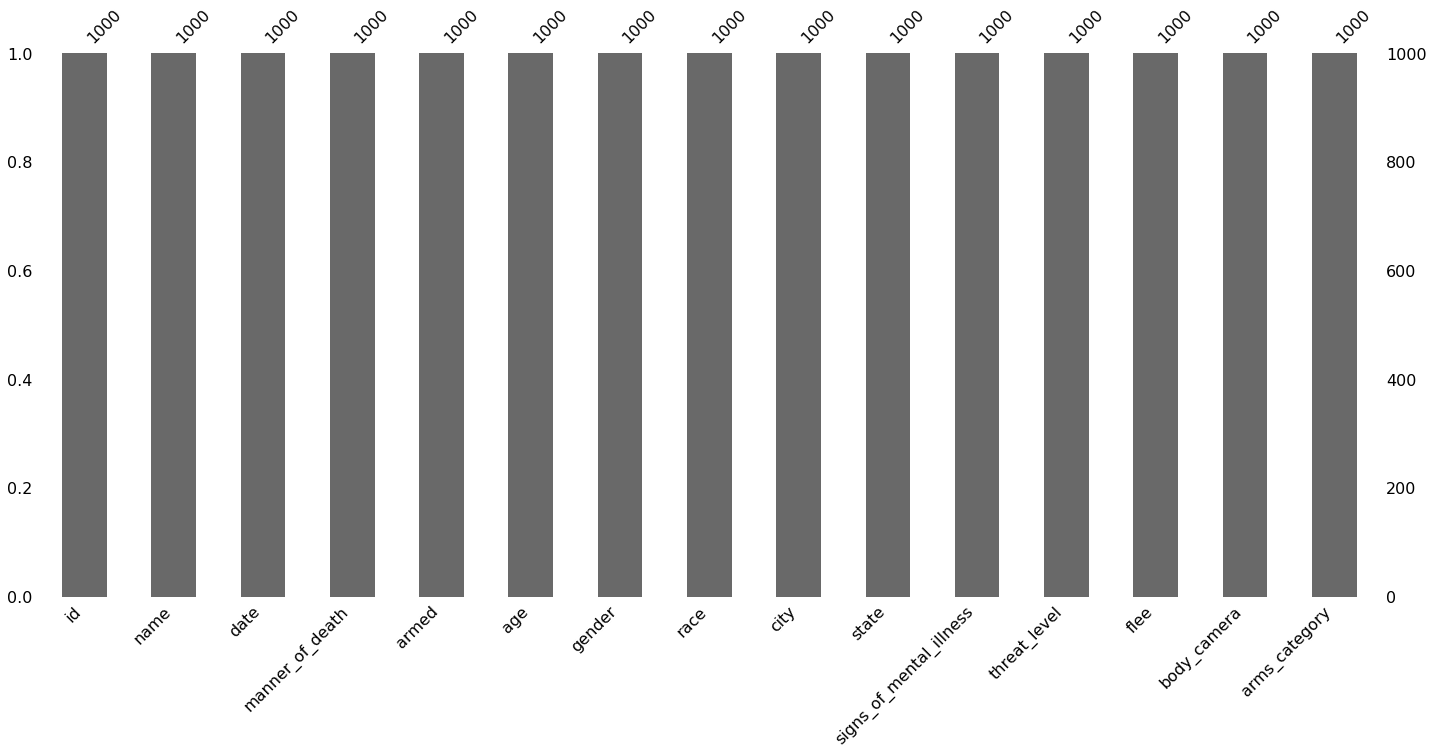

In [49]:
#The missingno module can be used to graphically show the nullity of the data using the bar command
msno.bar(data.sample(1000));

##### Since all the bars reach the peak, it means none of the columns have a null value hence reaffirming the output from the preceeding line of code. If there were null or missing values, the height of the various bars representing the columns will not reach the peak

## Checking if there are any duplicates in the dataset

In [50]:
# we know that column 'id' is unique, but what if we drop it?
data_dedupped = data.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
# the above code helps drops the id column which is a unique identification for all the rows so that any duplicate row will be dropped
print(data.shape)
print(data_dedupped.shape)

(4895, 15)
(4895, 14)


##### The output of the above code shows that none of the rows are a duplicate. It shows that each one is distinct from the other one. If there were to be duplicates, then the first entry of the second tuple will be less than the first entry of the first tuple but since they are the same, it means that there are no duplicates in the rows of the dataset. This is quite tricky since there can be a situation where different policemen gave different reports for the same individual. To find out thing, we run a code with the name duplicates and check for each.

##### This will be done by quering for the rows.

In [51]:
#This is to show the first 5 rows of the new table produced without the id 
data_dedupped.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [52]:
#This is to show the last 5 rows of the new table produced without the id 
data_dedupped.tail()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [64]:
#This is to check for the various names that are repeating
names = data.name.value_counts(ascending=True, dropna = False)
names

Harry Gipson                1
Dylan Joseph-Mark Cross     1
Isaac Padilla               1
Steven Alfred Longoria      1
Glenn Southwood Jr.         1
                           ..
Jeffrey Sims                2
Miguel Mercado Segura       2
Michael Brown               2
Roderick McDaniel           2
TK TK                      29
Name: name, Length: 4851, dtype: int64

In [69]:
#This is to show the number of duplicates in the data
names.tail(20)

Nicholas Pimentel            1
Isaiah Tucker                1
William Porubsky             1
Joseph Santos                2
Robert Edwards               2
Michael Johnson              2
Benjamin Diaz                2
David Tylek Atkinson         2
Timothy Leroy Harrington     2
Robert Martinez              2
Jose Mendez                  2
Brandon Jones                2
Michael Ferguson             2
Eric Harris                  2
Clayton Andrews              2
Jeffrey Sims                 2
Miguel Mercado Segura        2
Michael Brown                2
Roderick McDaniel            2
TK TK                       29
Name: name, dtype: int64

In [70]:
#This is to show whether the name Joseph Santos refers to different people or it is just a duplicate
data.loc[data['name'] == 'Joseph Santos']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2684,3119,Joseph Santos,2017-11-09,shot,unknown,32,M,White,Providence,RI,False,attack,Car,True,Unknown
3348,3897,Joseph Santos,2018-07-28,shot,unarmed,44,M,Hispanic,South Whitehall Township,PA,False,undetermined,Not fleeing,False,Unarmed


In [71]:
#This is to show whether the name Robert Edwards refers to different people or it is just a duplicate
data.loc[data['name'] == 'Robert Edwards']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
30,54,Robert Edwards,2015-01-14,shot,gun,68,M,White,Lake Jackson,TX,False,attack,Not fleeing,False,Guns
2760,3222,Robert Edwards,2017-12-20,shot,toy weapon,33,M,White,Miami Township,OH,True,other,Not fleeing,False,Other unusual objects


In [73]:
#This is to show whether the name Michael Johnson refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Johnson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1310,1526,Michael Johnson,2016-05-09,shot,gun,26,M,White,Chicago,IL,False,other,Foot,False,Guns
1362,1586,Michael Johnson,2016-06-01,shot,gun,21,M,Black,Newnan,GA,False,attack,Foot,True,Guns


In [74]:
#This is to show whether the name Benjamin Diaz refers to different people or it is just a duplicate
data.loc[data['name'] == 'Benjamin Diaz']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4350,5150,Benjamin Diaz,2019-11-01,shot,sharp object,22,M,Hispanic,Alamogordo,NM,False,attack,Car,False,Sharp objects
4354,5191,Benjamin Diaz,2019-11-01,shot,box cutter,22,M,Hispanic,Alamogordo,NM,False,attack,Not fleeing,False,Sharp objects


In [75]:
#This is to show whether the name David Tylek Atkinson refers to different people or it is just a duplicate
data.loc[data['name'] == 'David Tylek Atkinson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4829,5835,David Tylek Atkinson,2020-05-13,shot,gun,24,M,Black,Raleigh,NC,False,attack,Foot,False,Guns
4830,5889,David Tylek Atkinson,2020-05-13,shot,gun,24,M,Black,Raleigh,NC,False,attack,Foot,True,Guns


In [76]:
#This is to show whether the name Timothy Leroy Harrington refers to different people or it is just a duplicate
data.loc[data['name'] == 'Timothy Leroy Harrington']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4632,5537,Timothy Leroy Harrington,2020-02-14,shot,gun,58,M,White,Polkton,NC,False,other,Car,False,Guns
4635,5548,Timothy Leroy Harrington,2020-02-14,shot,gun,58,M,White,Polkton,NC,False,attack,Car,False,Guns


In [77]:
#This is to show whether the name Robert Martinez refers to different people or it is just a duplicate
data.loc[data['name'] == 'Robert Martinez']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2818,3309,Robert Martinez,2018-01-15,shot,gun,42,M,Hispanic,Eugene,OR,False,other,Not fleeing,False,Guns
3744,4434,Robert Martinez,2019-02-01,shot,vehicle,45,M,Hispanic,Denver,CO,False,attack,Car,False,Vehicles


In [78]:
#This is to show whether the name Jose Mendez refers to different people or it is just a duplicate
data.loc[data['name'] == 'Jose Mendez']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1060,1240,Jose Mendez,2016-02-06,shot,gun,16,M,Hispanic,Los Angeles,CA,False,attack,Car,True,Guns
4183,4934,Jose Mendez,2019-08-09,shot,gun and vehicle,37,M,Hispanic,Kansas City,MO,False,attack,Foot,False,Multiple


In [79]:
#This is to show whether the name Brandon Jones refers to different people or it is just a duplicate
data.loc[data['name'] == 'Brandon Jones']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
205,229,Brandon Jones,2015-03-19,shot,unarmed,18,M,Black,Cleveland,OH,False,attack,Not fleeing,False,Unarmed
1724,1991,Brandon Jones,2016-10-25,shot,toy weapon,25,M,White,Elkton,MD,True,attack,Not fleeing,False,Other unusual objects


In [80]:
#This is to show whether the name Michael Ferguson refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Ferguson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1595,1841,Michael Ferguson,2016-08-31,shot,gun,21,M,White,Denver,CO,False,attack,Foot,False,Guns
4800,5769,Michael Ferguson,2020-05-03,shot,gun,54,M,White,Fort Lauderdale,FL,False,other,Not fleeing,False,Guns


In [81]:
#This is to show whether the name Eric Harris refers to different people or it is just a duplicate
data.loc[data['name'] == 'Eric Harris']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
246,291,Eric Harris,2015-04-02,shot,unarmed,44,M,Black,Tulsa,OK,False,other,Not fleeing,False,Unarmed
1065,1252,Eric Harris,2016-02-08,shot,unknown,22,M,Black,New Orleans,LA,False,other,Car,False,Unknown


In [83]:
#This is to show whether the name Clayton Andrew refers to different people or it is just a duplicate
data.loc[data['name'] == 'Clayton Andrews']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4332,5128,Clayton Andrews,2019-10-25,shot,gun,40,M,White,Kansas,OK,False,attack,Not fleeing,False,Guns
4335,5135,Clayton Andrews,2019-10-26,shot,gun,40,M,White,Creek County,OK,True,attack,Car,False,Guns


In [84]:
#This is to show whether the name Jeffrey Sims refers to different people or it is just a duplicate
data.loc[data['name'] == 'Jeffrey Sims']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1321,1538,Jeffrey Sims,2016-05-14,shot,gun,59,M,White,Osteen,FL,False,attack,Not fleeing,False,Guns
3450,4045,Jeffrey Sims,2018-09-18,shot,knife,37,M,White,Marysville,WA,True,attack,Not fleeing,False,Sharp objects


In [85]:
#This is to show whether the name Miguel Mercado Segura refers to different people or it is just a duplicate
data.loc[data['name'] == 'Miguel Mercado Segura']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4568,5389,Miguel Mercado Segura,2020-01-20,shot,gun,31,M,Hispanic,Fountain Valley,CA,False,other,Foot,False,Guns
4574,5515,Miguel Mercado Segura,2020-01-21,shot,gun,31,M,Hispanic,Fountain Valley,CA,False,other,Foot,False,Guns


In [88]:
#This is to show whether the name Michael Brown refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Brown']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1044,1225,Michael Brown,2016-01-31,shot and Tasered,unarmed,25,M,White,Saginaw,TX,False,attack,Not fleeing,False,Unarmed
2306,2671,Michael Brown,2017-06-15,shot,gun,40,M,White,Newton,NH,False,undetermined,Car,False,Guns


In [89]:
#This is to show whether the name Roderick McDaniel refers to different people or it is just a duplicate
data.loc[data['name'] == 'Roderick McDaniel']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3576,4195,Roderick McDaniel,2018-11-19,shot,gun,33,M,Black,Magnolia,AR,False,attack,Not fleeing,False,Guns
3577,4237,Roderick McDaniel,2018-11-20,shot,vehicle,33,M,Black,Magnolia,AR,False,attack,Not fleeing,False,Vehicles


In [90]:
#This is to show whether the name TK TK refers to different people or it is just a duplicate
#From our research, we found at TK means to come hence this is not a particular name
data.loc[data['name'] == 'TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1600,1848,TK TK,2016-09-01,shot and Tasered,pipe,37,M,Hispanic,Huntington Park,CA,False,other,Not fleeing,False,Blunt instruments
1959,2278,TK TK,2017-01-31,shot and Tasered,knife,37,M,Black,Hollywood,CA,True,attack,Not fleeing,False,Sharp objects
2148,2494,TK TK,2017-04-10,shot,gun,39,M,Black,Houston,TX,False,other,Foot,True,Guns
2220,2573,TK TK,2017-05-11,shot,gun,37,M,Hispanic,Arlington,TX,False,attack,Not fleeing,False,Guns
2252,2606,TK TK,2017-05-24,shot,gun,37,M,Hispanic,Los Angeles,CA,False,attack,Not fleeing,False,Guns
2368,2752,TK TK,2017-07-07,shot,unknown,16,M,White,Huntsville,AL,False,attack,Car,False,Unknown
2448,2837,TK TK,2017-08-04,shot,gun,47,M,Black,San Diego,CA,False,other,Not fleeing,False,Guns
2561,2979,TK TK,2017-09-22,shot,unknown,37,M,White,Denver,CO,False,other,Not fleeing,False,Unknown
2676,3112,TK TK,2017-11-06,shot,gun,48,M,White,Barstow,CA,False,attack,Car,False,Guns
2692,3131,TK TK,2017-11-10,shot,unknown,37,M,Black,Hinds County,MS,False,other,Not fleeing,False,Unknown


### Summary Of The Duplicates Check Above

##### The above analysis brings to light that the repetition of the names doesn't mean they are the same since there can be the same name for different people. This is due to the fact that some of the people with the same names have different ages and hence are different people. Also some died in different states. For the other groups of people with same name and age, after dropping the id and name columns it will come to light that they are actually different. This is made evident in names like Roderick McDaniel where the armed and arms_category column have different values. This means that the report given by the policemen were different and can be they were trying to lie and since we do not have enough reason to drop this, we include it for further analysis.

## Checking For Outliers In The Data

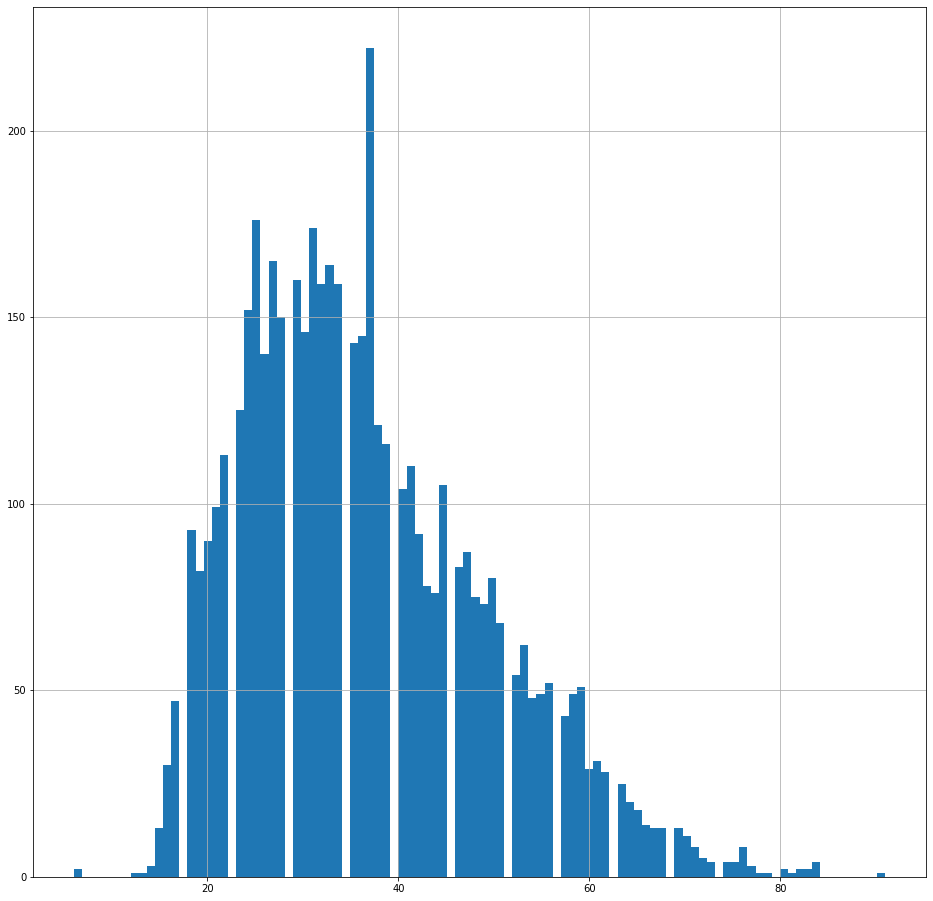

In [53]:
# histogram of age to show how the values are arranged
data['age'].hist(bins=100, figsize=(16,16));

In [54]:
#This is to describe the age column by showing the various percentiles, max, min values etc
data['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

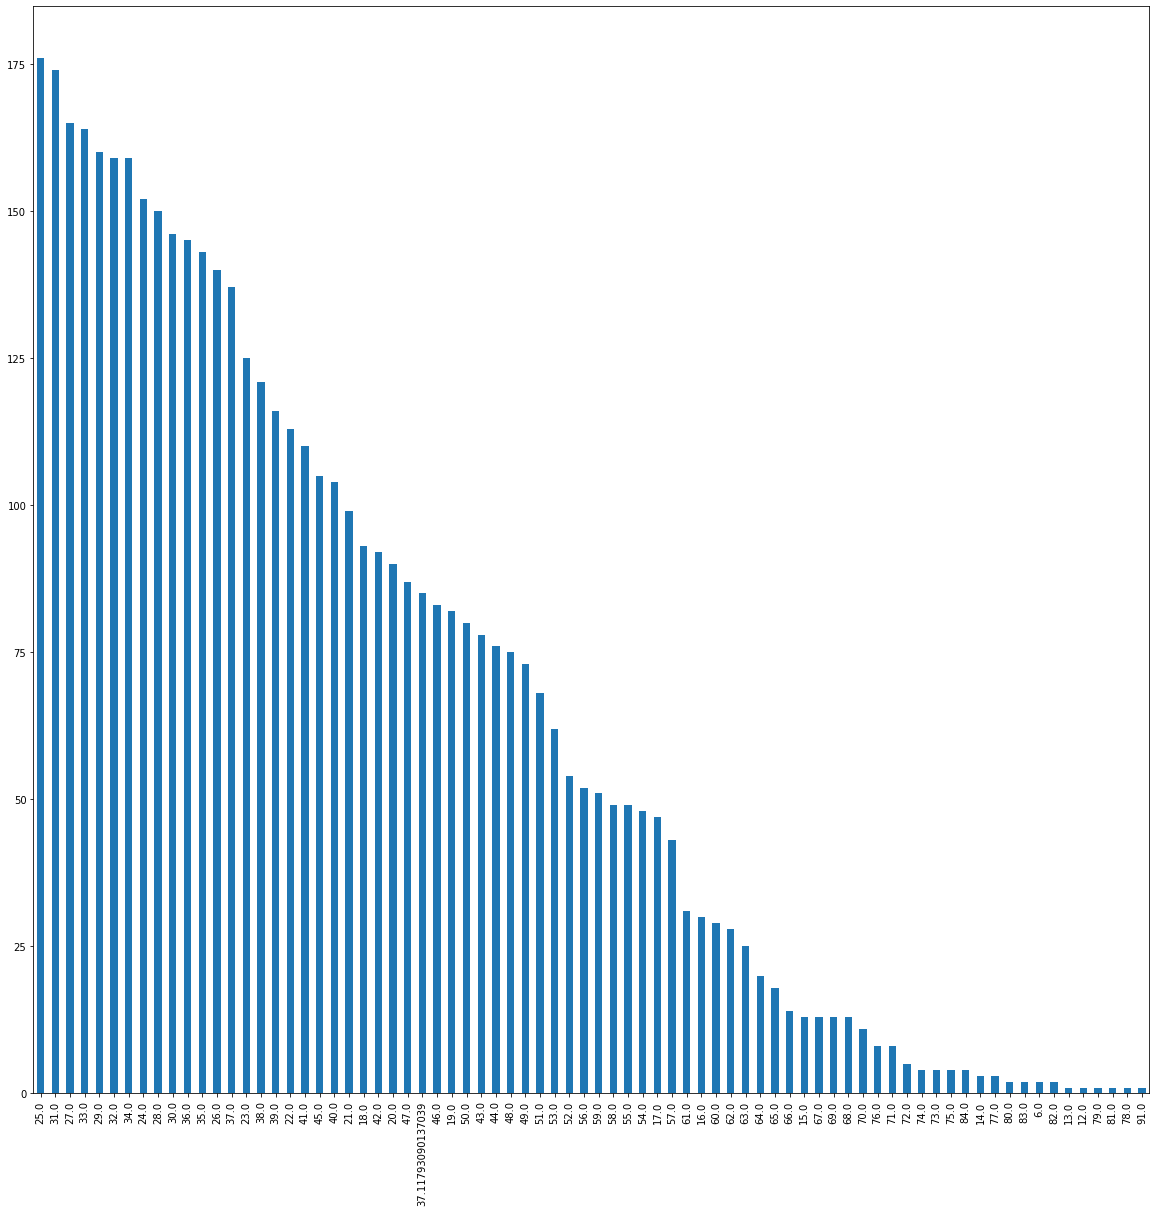

In [55]:
data['age'].value_counts().plot.bar(figsize=(20,20));

##### From the output of the above code, it is realized that the ages are in float and hence there is a weird age value of 37.11793090137039. To clean this, we will turn the whole age column into an integer so that the effect of this value will not affect our analysis

In [58]:
#This code is to turn the age column into an integer in order to reduce the effect of 37.11793090137039 in further analysis
data['age']=data['age'].astype('int64')

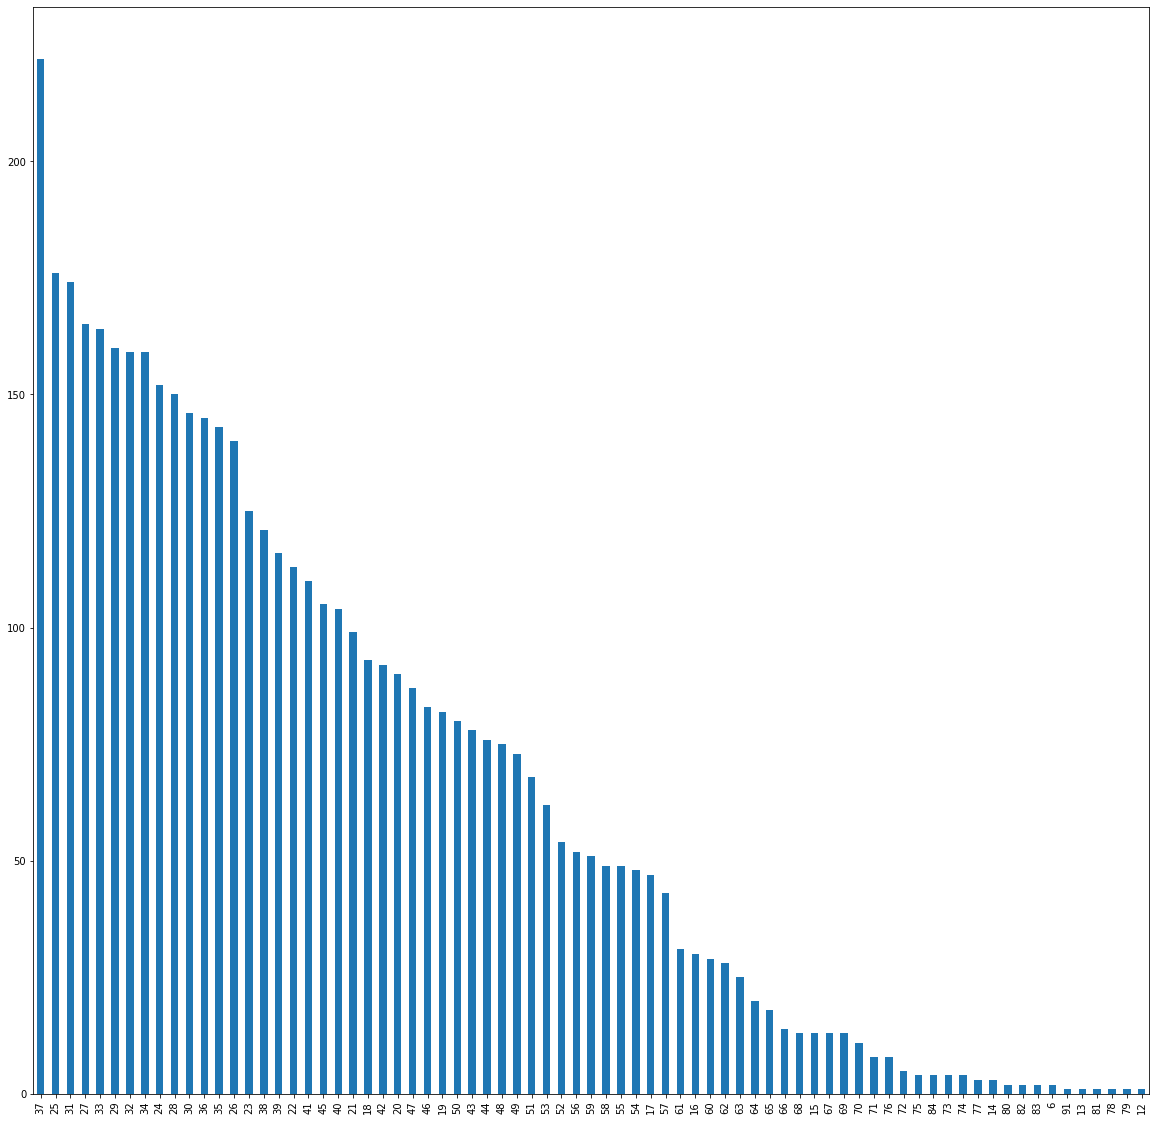

In [59]:
#This is to plot the age column again to see if actually all the values of the ages are now integers
data['age'].value_counts().plot.bar(figsize=(20,20));

##### From the above, it can be noticed that the float value of  37.11793090137039 has been converted to 37 and added to the 37 values for better analysis of the data

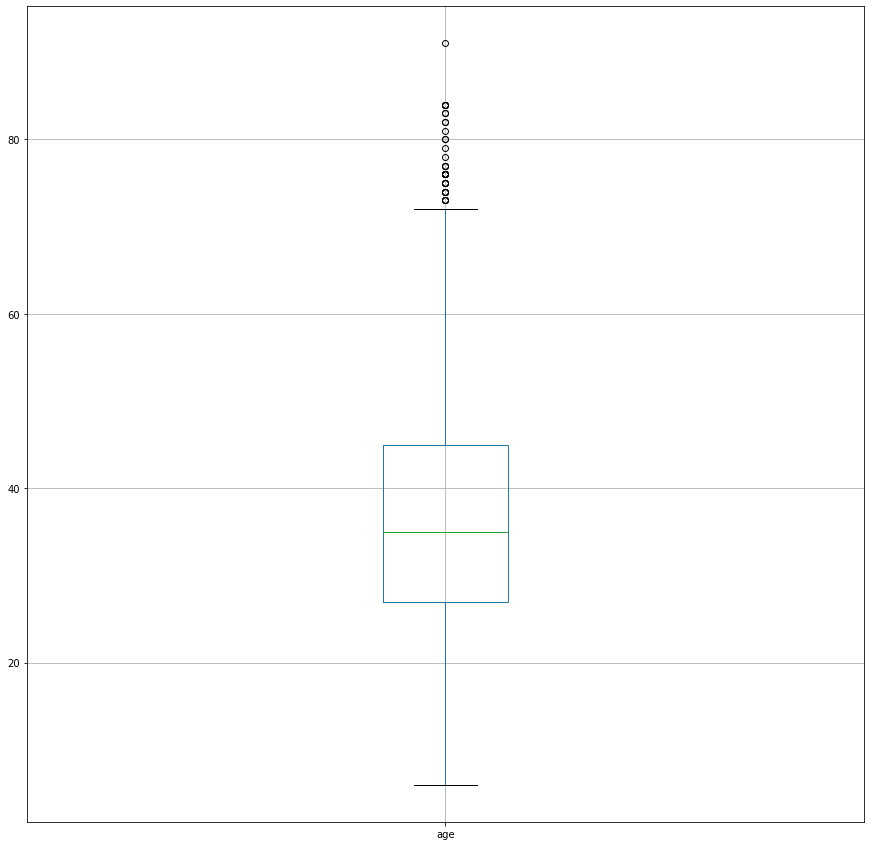

In [60]:
#To make a boxplot to show how the data is distributed
data.boxplot(column=['age'], figsize=(15, 15));

## Checking For Less Important Data In The DataSet

In [61]:
#This code is used to calculate the columns with more than 90% of the rows having the same values
#This is done to give an overview of the columns that should be given higher priority in the analysis of the data
num_rows = len(data.index)
low_information_cols = [] 

for col in data.columns:
    counts = data[col].value_counts(dropna=False)
    top_pct = (counts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(counts)
        print()

manner_of_death: 94.93361%
shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

gender: 95.46476%
M    4673
F     222
Name: gender, dtype: int64



## Checking For Inconsistent Data In The DataSet

##### Inconsistent Data usually come from differences where there is capital letters and small letters representing the same thing like name. For examples James and james meaning the same in a dataset but will be seen to be different because of capitalizations. To get this right, all the columns with string inputs will be converted to smaller case and see if the original values we had after running the describe method gives the same values with the lower case.

In [93]:
#This converts the name column to lower case and count the various values
data['name'].str.lower().value_counts(ascending = True, dropna=False)

john albers                      1
george wayne mccallum            1
robert mark frady                1
salvadro alfredo pablo lopez     1
india beaty                      1
                                ..
clayton andrews                  2
robert martinez                  2
miguel mercado segura            2
michael brown                    2
tk tk                           29
Name: name, Length: 4851, dtype: int64

In [94]:
#This converts the armed column to lower case and count the various values
data['armed'].str.lower().value_counts(ascending = True, dropna=False)

grenade               1
hand torch            1
carjack               1
metal rake            1
air conditioner       1
                   ... 
toy weapon          171
unarmed             348
unknown             418
knife               708
gun                2755
Name: armed, Length: 89, dtype: int64

In [95]:
#This converts the manner of death column to lower case and count the various values
data['manner_of_death'].str.lower().value_counts(ascending = True, dropna=False)

shot and tasered     248
shot                4647
Name: manner_of_death, dtype: int64

In [96]:
#This converts the arms category column to lower case and count the various values
data['arms_category'].str.lower().value_counts(ascending = True, dropna=False)

hand tools                  1
explosives                  4
electrical devices         24
piercing objects           29
multiple                   54
vehicles                  121
blunt instruments         122
other unusual objects     192
unarmed                   348
unknown                   418
sharp objects             818
guns                     2764
Name: arms_category, dtype: int64

In [97]:
#This converts the city column to lower case and count the various values
data['city'].str.lower().value_counts(ascending = True, dropna=False)

childress         1
hyattsville       1
west ouachita     1
pine river        1
ross township     1
                 ..
san antonio      40
las vegas        41
houston          51
phoenix          66
los angeles      78
Name: city, Length: 2287, dtype: int64

In [98]:
#This converts the state column to lower case and count the various values
data['state'].str.lower().value_counts(ascending = True, dropna=False)

ri      4
vt      8
de     10
nd     11
nh     12
dc     13
wy     13
sd     14
ct     20
me     21
ne     24
hi     29
mt     29
ia     31
ma     33
ak     36
id     37
wv     46
ks     49
ut     58
nj     60
mn     60
ms     61
mi     71
ar     73
or     76
md     77
sc     80
nv     85
ky     87
wi     88
ny     90
in     91
va     92
nm     93
al     95
pa     95
il     99
la    102
mo    124
tn    125
wa    126
oh    146
nc    148
ok    151
ga    161
co    168
az    222
fl    324
tx    426
ca    701
Name: state, dtype: int64

In [99]:
#This converts the race column to lower case and count the various values
data['race'].str.lower().value_counts(ascending = True, dropna=False)

other         48
native        78
asian         93
hispanic     902
black       1298
white       2476
Name: race, dtype: int64

In [100]:
#This converts the threat column to lower case and count the various values
data['threat_level'].str.lower().value_counts(ascending = True, dropna=False)

undetermined     207
other           1528
attack          3160
Name: threat_level, dtype: int64

In [102]:
#This converts the flee column to lower case and count the various values
data['flee'].str.lower().value_counts(ascending = True, dropna=False)

other           360
foot            642
car             820
not fleeing    3073
Name: flee, dtype: int64

### Summary Of The Above Code For Inconsistent Data
##### From the above, the various counts after the columns with string values were converted to lowercase and counted gave the same counts as they were in their normal cases. This shows that the data is consistent

# 3. Analysis Of Data ( Visualizations )
### This is made up of the various diagrams and charts showing the relationships between the variables

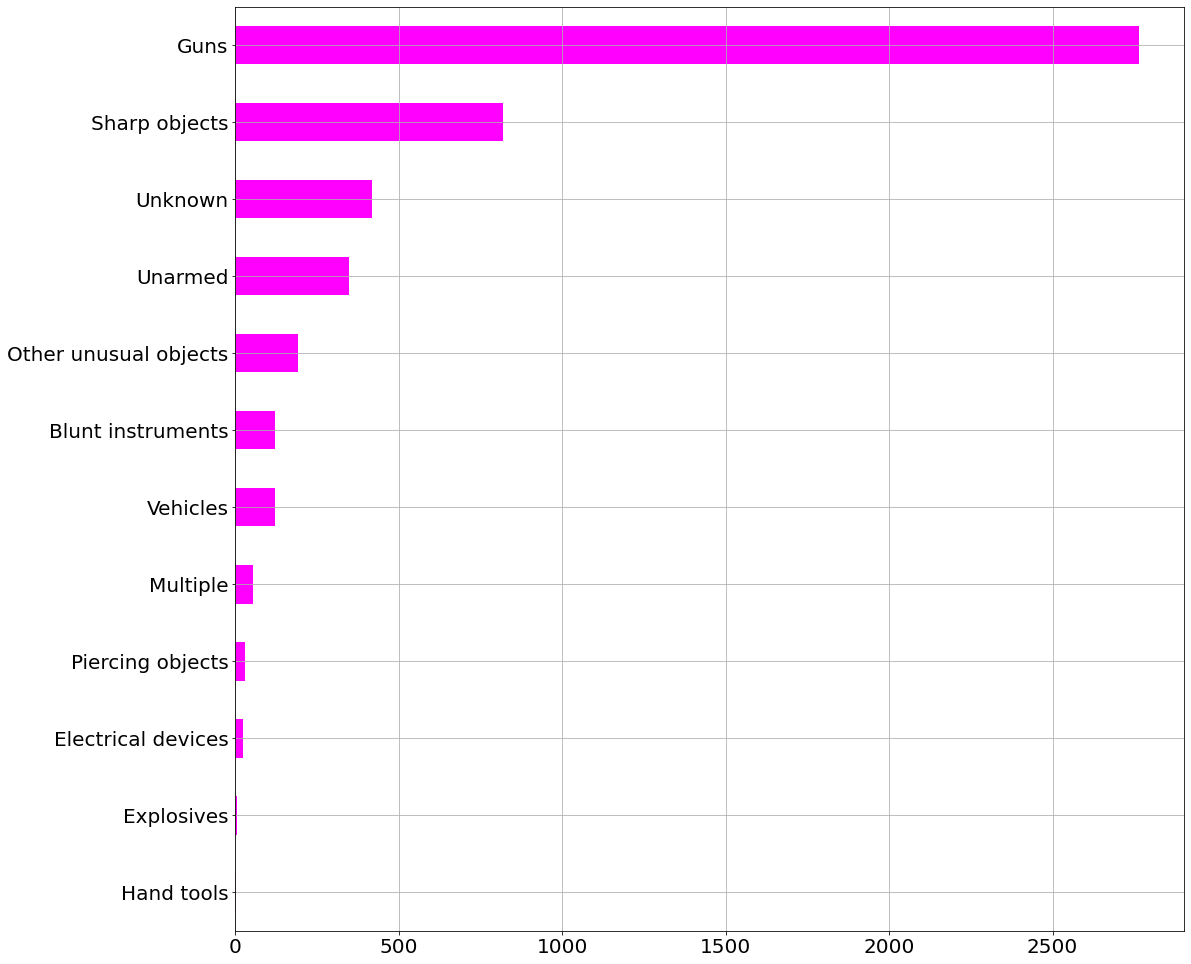

In [157]:
#This is to show a graph of the various counts of values of the arms category
data['arms_category'].value_counts(ascending=True).plot(kind='barh', figsize=(17,17), colormap='spring', grid =True, fontsize=20);

##### The output above shows that, the arms category usually possessed by the shot victims is guns with a count rate of more than 2.5K, followed by sharp objects, then unknown with the least being hand tools.

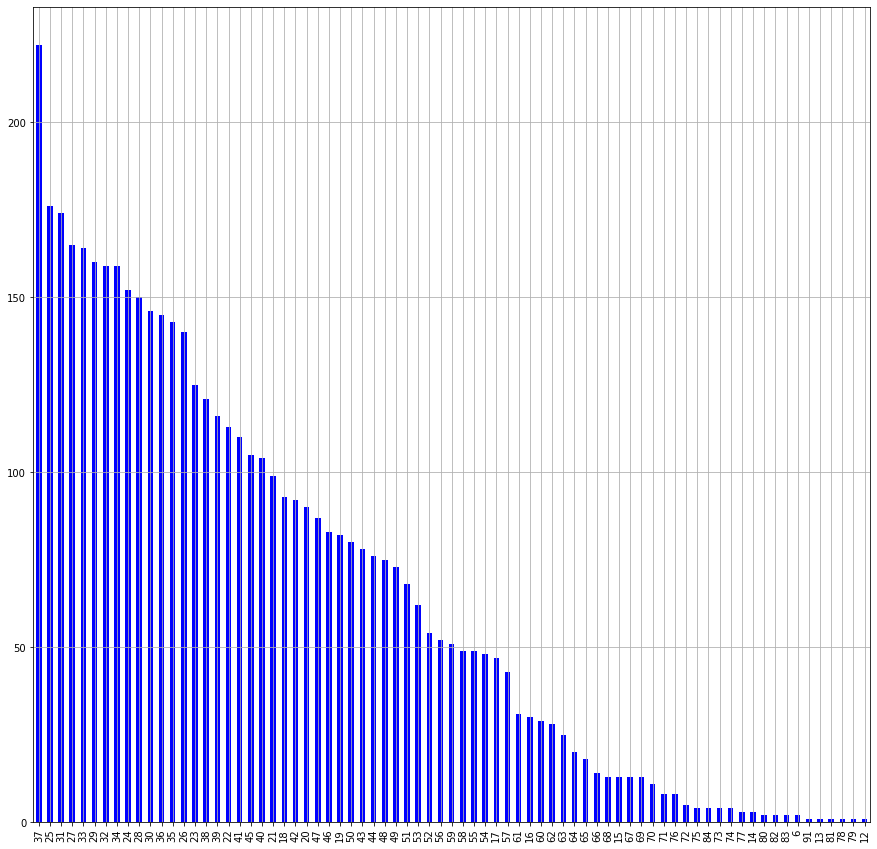

In [155]:
#This is to show a graph of the various counts of values of the age column
data['age'].value_counts().plot(kind='bar', figsize=(15,15), colormap='brg',fontsize=10, grid=True);

##### The above output shows that most people who are killed are within the ages of 20 to 60. People less than 20 do not have much count.

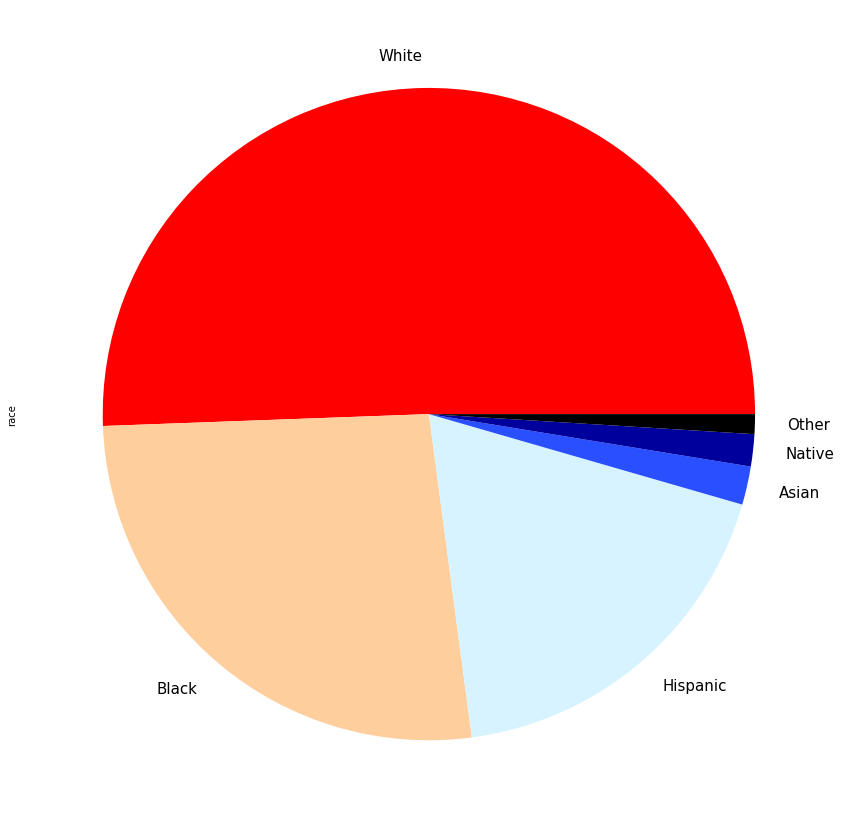

In [171]:
#This is to show a graph of the various counts of values of the race column
data['race'].value_counts().plot(kind='pie', figsize=(15,15), colormap='flag',fontsize=15, grid=True);

##### The above output shows that actually the US Police Department do not kill mostly Blacks as we thought but rather Whites

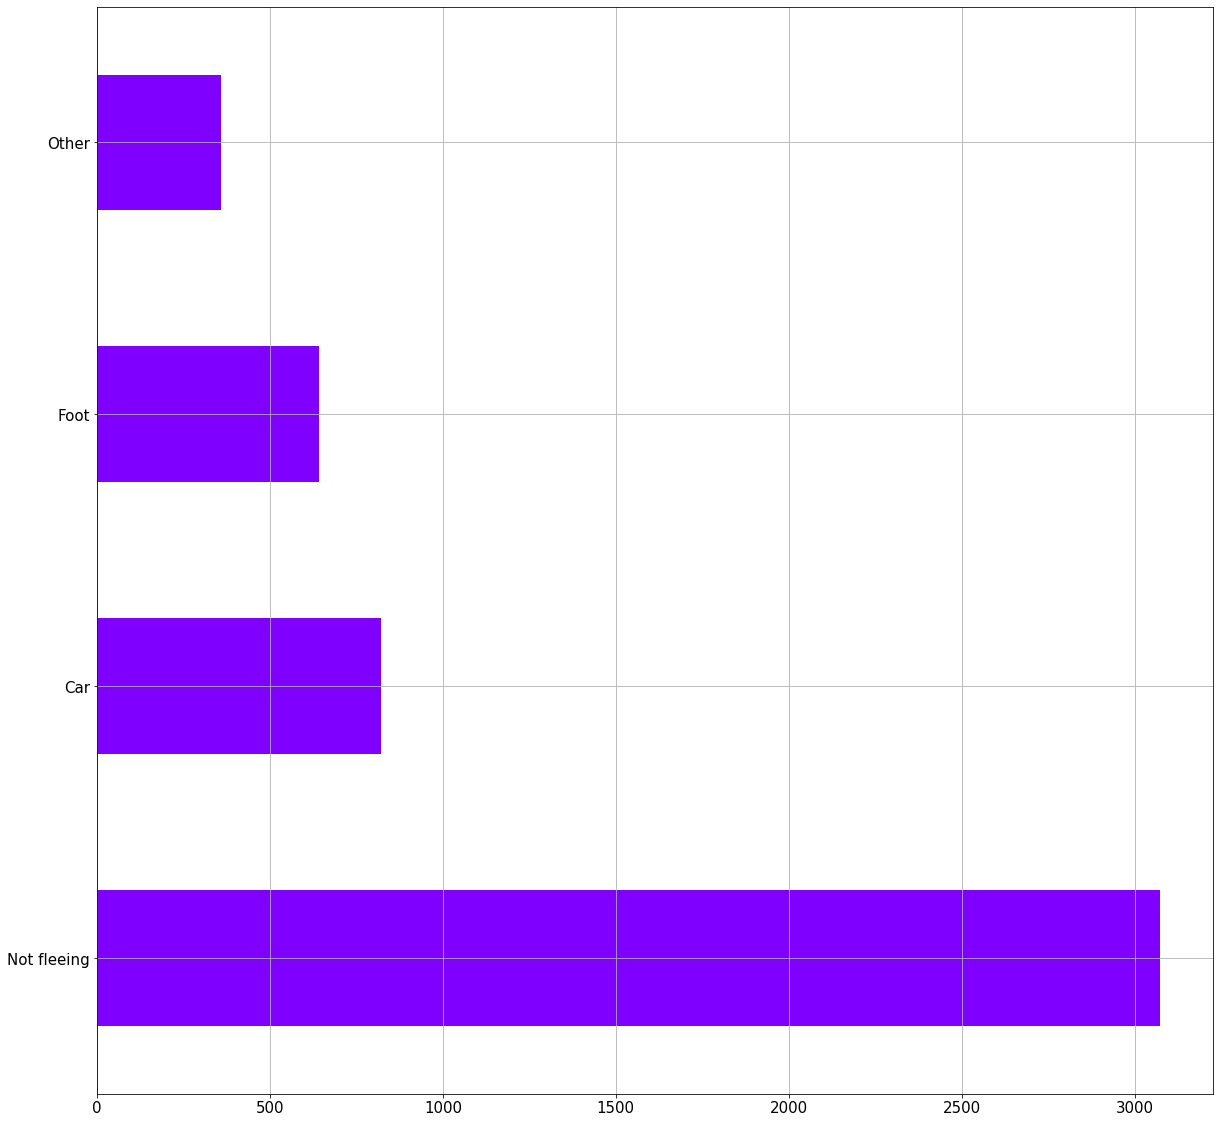

In [173]:
#This is to show a graph of the various counts of values of the flee column
data['flee'].value_counts().plot(kind='barh', figsize=(20,20), colormap='rainbow',fontsize=15, grid=True);

##### The above output shows that the US Police Department usually shoot people who are not fleeing. This shows that those who try to turn in to the police are usually shot and those who try to flee for their lives using various means are saved.

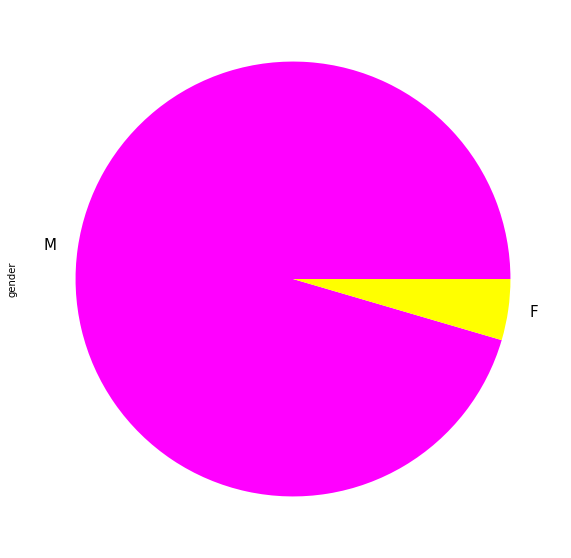

In [180]:
#This is to show a graph of the various counts of values of the gender column
data['gender'].value_counts().plot(kind='pie', figsize=(10,10), colormap='spring',fontsize=15, grid=True);

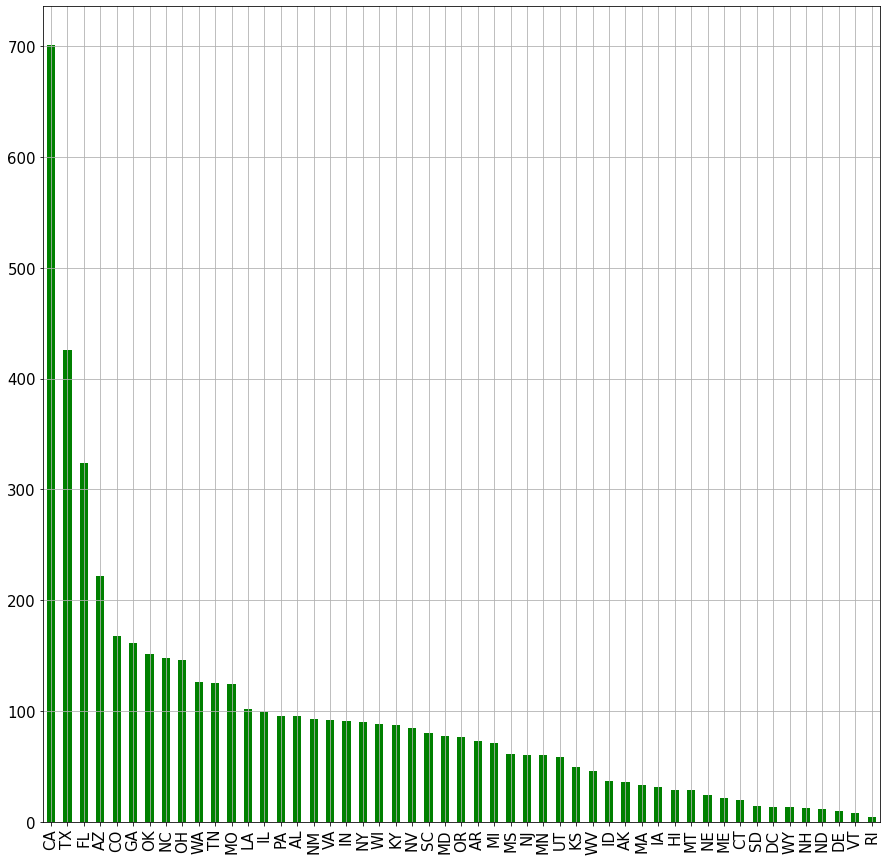

In [186]:
#This is to show a graph of the various counts of values of the state column
data['state'].value_counts().plot(kind='bar', figsize=(15,15), colormap='ocean',fontsize=15, grid=True);

##### From the output above, the state of California has the highest shooting cases with the state of Rhode Island having the least shooting cases. The state of California has a count of more than 700

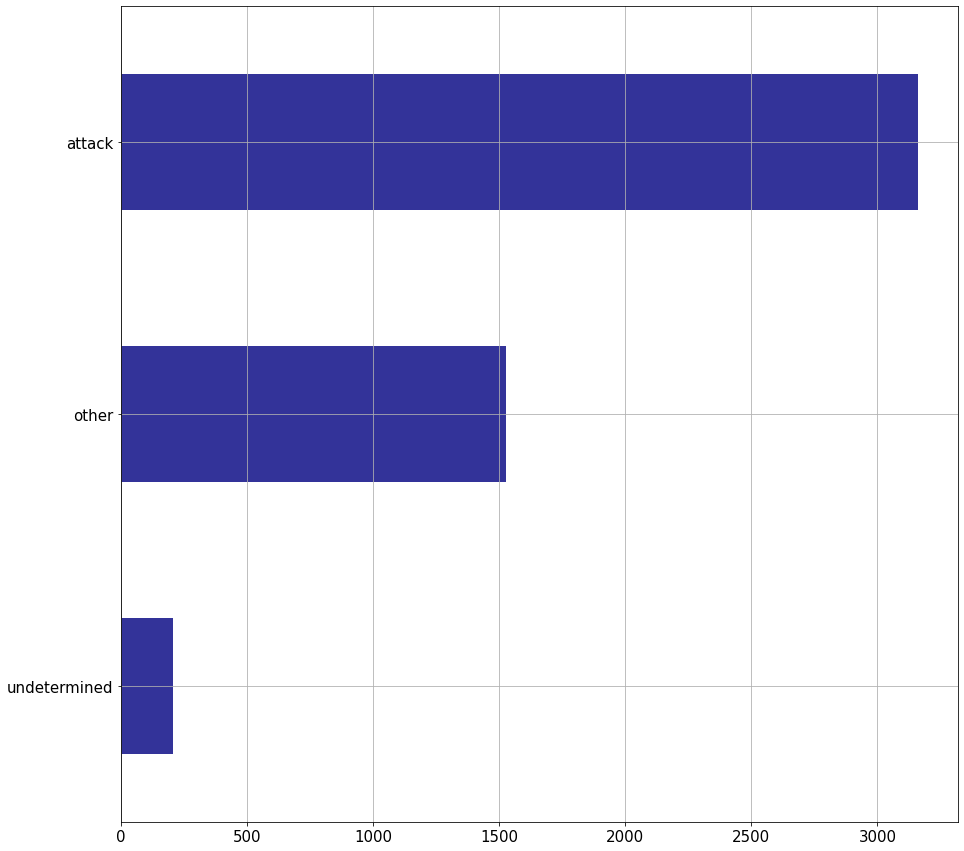

In [194]:
#This is to show a graph of the various counts of values of the threat level column
data['threat_level'].value_counts(ascending=True).plot(kind='barh', figsize=(15,15), colormap='terrain',fontsize=15, grid=True);

##### The above horizontal graph shows clearly that, the number of people that tried to attack were shot a lot than others. The total number of who tried to attack and were shot goes over 3000 showing that a significant proportion of the shooting cases find those who try to attack as victims

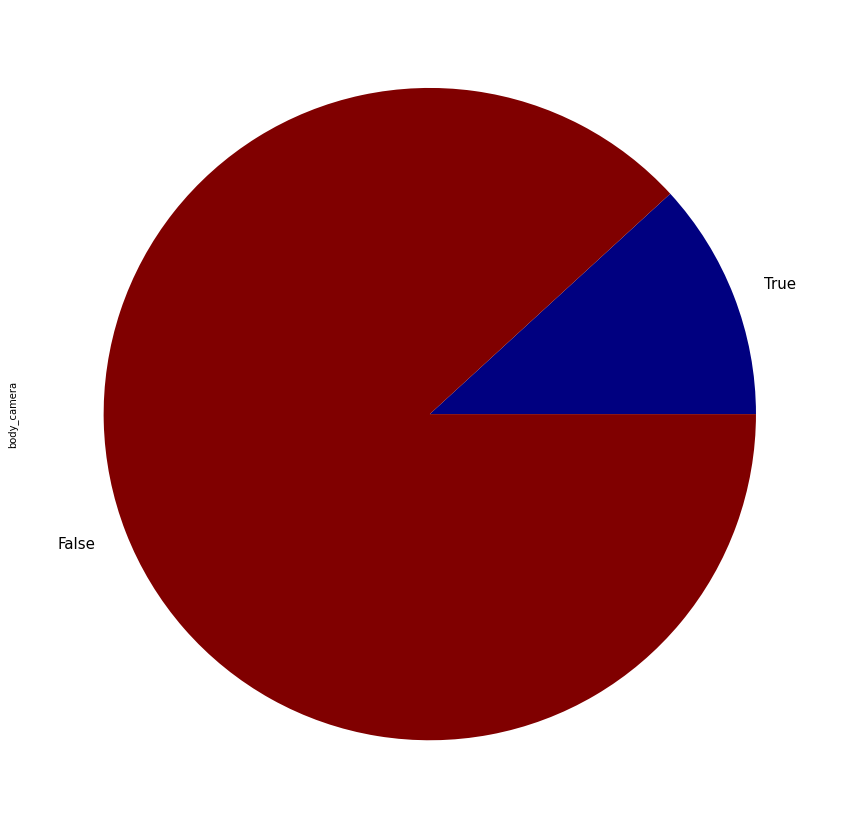

In [201]:
#This is to show a graph of the various counts of values of the threat level column
data['body_camera'].value_counts(ascending=True).plot(kind='pie', figsize=(15,15), colormap='jet',fontsize=15, grid=True);

##### From the above diagram, the number of US Police personnel that shot people without their cameras on is more than 75% of the total number of people shot. This shows that some US Police personnel try to keep the incident clean.